In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
%matplotlib inline
sns.set()

In [2]:
path = r'rnd/2013-8/'                     # use your path
all_files = glob.glob(os.path.join(path, "1*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f, sep = ';\t') for f in all_files)
concatenated_df   = pd.concat(df_from_each_file)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [3]:
concatenated_df['Timestamp'] = pd.to_datetime(concatenated_df['Timestamp [ms]'], unit = 's')
concatenated_df.apply(pd.to_numeric, errors='ignore')
concatenated_df.describe()


Timestamp [ms]      CPU cores  CPU capacity provisioned [MHZ]  \
count    9.569690e+05  956969.000000                   956969.000000   
mean     1.376604e+09       2.882605                     7709.137737   
std      7.477136e+05       1.399861                     3767.003529   
min      1.375308e+09       0.000000                        0.000000   
25%      1.375957e+09       1.000000                     2925.999318   
50%      1.376604e+09       4.000000                    10399.997204   
75%      1.377252e+09       4.000000                    10399.998464   
max      1.377900e+09       4.000000                    11704.001168   

       CPU usage [MHZ]  CPU usage [%]  Memory capacity provisioned [KB]  \
count    956969.000000  956969.000000                      9.569690e+05   
mean        432.905429       4.556463                      6.283470e+06   
std        1647.829960      15.764931                      5.785848e+06   
min           0.000000       0.000000                      0.000000e+00   
25%          25.999997       1.000000                      2.105344e+06   
50%         152.151965       1.516667                      3.024896e+06   
75%         183.733305       1.833333                      8.357888e+06   
max       11454.312686     105.166667                      1.677722e+07   

       Memory usage [KB]  Disk read throughput [KB/s]  \
count       9.569690e+05                956969.000000   
mean        2.579660e+05                     6.646575   
std         7.342356e+05                   281.415375   
min         0.000000e+00                     0.000000   
25%         4.473707e+04                     0.000000   
50%         1.230328e+05                     0.000000   
75%         2.013264e+05                     0.000000   
max         1.533437e+07                 81284.600000   

       Disk write throughput [KB/s]  Network received throughput [KB/s]  \
count                 956969.000000                       956969.000000   
mean                      42.370781                            8.336966   
std                      578.814712                          219.713627   
min                        0.000000                            0.000000   
25%                        2.400000                            0.000000   
50%                        8.933333                            1.000000   
75%                       12.466667                            4.533333   
max                    91548.000000                        92393.500000   

       Network transmitted throughput [KB/s]  
count                          956969.000000  
mean                               10.237593  
std                               284.811822  
min                                 0.000000  
25%                                 0.000000  
50%                                 0.000000  
75%                                 0.200000  
max                             50715.733333

In [4]:
concatenated_df.head()

Timestamp [ms]  CPU cores  CPU capacity provisioned [MHZ]  CPU usage [MHZ]  \
0      1375308176          2                       5851.9989       747.105193   
1      1375308476          2                       5851.9989       672.979873   
2      1375308776          2                       5851.9989       743.203860   
3      1375309076          2                       5851.9989       758.809191   
4      1375309376          2                       5851.9989       661.275876   

   CPU usage [%]  Memory capacity provisioned [KB]  Memory usage [KB]  \
0      12.766667                         8388608.0          1308620.0   
1      11.500000                         8388608.0          1157626.4   
2      12.700000                         8388608.0          1157625.6   
3      12.966667                         8388608.0          1073740.8   
4      11.300000                         8388608.0           973076.0   

   Disk read throughput [KB/s]  Disk write throughput [KB/s]  \
0                          0.0                      1.000000   
1                          0.0                      1.000000   
2                          0.0                      1.000000   
3                          0.0                      1.000000   
4                          0.0                      0.933333   

   Network received throughput [KB/s]  Network transmitted throughput [KB/s]  \
0                           11.000000                              27.200000   
1                           13.466667                              30.666667   
2                           13.400000                              33.466667   
3                           11.866667                              27.666667   
4                           13.333333                              31.933333   

            Timestamp  
0 2013-07-31 22:02:56  
1 2013-07-31 22:07:56  
2 2013-07-31 22:12:56  
3 2013-07-31 22:17:56  
4 2013-07-31 22:22:56

In [5]:
concatenated_df['Timestamp'] = pd.to_datetime(concatenated_df['Timestamp [ms]'], unit = 's')
concatenated_df.apply(pd.to_numeric, errors='ignore')
concatenated_df.describe()
concatenated_df['weekday'] = concatenated_df['Timestamp'].dt.dayofweek


concatenated_df['weekend'] = ((concatenated_df.weekday) // 5 == 1).astype(float)
# Feature engineering with the date
concatenated_df['month']=concatenated_df.Timestamp.dt.month 
concatenated_df['day']=concatenated_df.Timestamp.dt.day
concatenated_df.set_index('Timestamp',inplace=True)


In [6]:
concatenated_df["CPU usage prev"] = concatenated_df['CPU usage [%]'].shift(1)


In [7]:
concatenated_df["CPU_diff"] = concatenated_df['CPU usage [%]'] - concatenated_df["CPU usage prev"]
concatenated_df.head()

Timestamp [ms]  CPU cores  \
Timestamp                                        
2013-07-31 22:02:56      1375308176          2   
2013-07-31 22:07:56      1375308476          2   
2013-07-31 22:12:56      1375308776          2   
2013-07-31 22:17:56      1375309076          2   
2013-07-31 22:22:56      1375309376          2   

                     CPU capacity provisioned [MHZ]  CPU usage [MHZ]  \
Timestamp                                                              
2013-07-31 22:02:56                       5851.9989       747.105193   
2013-07-31 22:07:56                       5851.9989       672.979873   
2013-07-31 22:12:56                       5851.9989       743.203860   
2013-07-31 22:17:56                       5851.9989       758.809191   
2013-07-31 22:22:56                       5851.9989       661.275876   

                     CPU usage [%]  Memory capacity provisioned [KB]  \
Timestamp                                                              
2013-07-31 22:02:56      12.766667                         8388608.0   
2013-07-31 22:07:56      11.500000                         8388608.0   
2013-07-31 22:12:56      12.700000                         8388608.0   
2013-07-31 22:17:56      12.966667                         8388608.0   
2013-07-31 22:22:56      11.300000                         8388608.0   

                     Memory usage [KB]  Disk read throughput [KB/s]  \
Timestamp                                                             
2013-07-31 22:02:56          1308620.0                          0.0   
2013-07-31 22:07:56          1157626.4                          0.0   
2013-07-31 22:12:56          1157625.6                          0.0   
2013-07-31 22:17:56          1073740.8                          0.0   
2013-07-31 22:22:56           973076.0                          0.0   

                     Disk write throughput [KB/s]  \
Timestamp                                           
2013-07-31 22:02:56                      1.000000   
2013-07-31 22:07:56                      1.000000   
2013-07-31 22:12:56                      1.000000   
2013-07-31 22:17:56                      1.000000   
2013-07-31 22:22:56                      0.933333   

                     Network received throughput [KB/s]  \
Timestamp                                                 
2013-07-31 22:02:56                           11.000000   
2013-07-31 22:07:56                           13.466667   
2013-07-31 22:12:56                           13.400000   
2013-07-31 22:17:56                           11.866667   
2013-07-31 22:22:56                           13.333333   

                     Network transmitted throughput [KB/s]  weekday  weekend  \
Timestamp                                                                      
2013-07-31 22:02:56                              27.200000        2      0.0   
2013-07-31 22:07:56                              30.666667        2      0.0   
2013-07-31 22:12:56                              33.466667        2      0.0   
2013-07-31 22:17:56                              27.666667        2      0.0   
2013-07-31 22:22:56                              31.933333        2      0.0   

                     month  day  CPU usage prev  CPU_diff  
Timestamp                                                  
2013-07-31 22:02:56      7   31             NaN       NaN  
2013-07-31 22:07:56      7   31       12.766667 -1.266667  
2013-07-31 22:12:56      7   31       11.500000  1.200000  
2013-07-31 22:17:56      7   31       12.700000  0.266667  
2013-07-31 22:22:56      7   31       12.966667 -1.666667

In [8]:
concatenated_df["received_prev"] = concatenated_df['Network received throughput [KB/s]'].shift(1)
concatenated_df["received_diff"] = concatenated_df['Network received throughput [KB/s]']- concatenated_df["received_prev"]

concatenated_df["transmitted_prev"] = concatenated_df['Network transmitted throughput [KB/s]'].shift(1)
concatenated_df["transmitted_diff"] = concatenated_df['Network transmitted throughput [KB/s]']- concatenated_df["transmitted_prev"]
concatenated_df.head()

Timestamp [ms]  CPU cores  \
Timestamp                                        
2013-07-31 22:02:56      1375308176          2   
2013-07-31 22:07:56      1375308476          2   
2013-07-31 22:12:56      1375308776          2   
2013-07-31 22:17:56      1375309076          2   
2013-07-31 22:22:56      1375309376          2   

                     CPU capacity provisioned [MHZ]  CPU usage [MHZ]  \
Timestamp                                                              
2013-07-31 22:02:56                       5851.9989       747.105193   
2013-07-31 22:07:56                       5851.9989       672.979873   
2013-07-31 22:12:56                       5851.9989       743.203860   
2013-07-31 22:17:56                       5851.9989       758.809191   
2013-07-31 22:22:56                       5851.9989       661.275876   

                     CPU usage [%]  Memory capacity provisioned [KB]  \
Timestamp                                                              
2013-07-31 22:02:56      12.766667                         8388608.0   
2013-07-31 22:07:56      11.500000                         8388608.0   
2013-07-31 22:12:56      12.700000                         8388608.0   
2013-07-31 22:17:56      12.966667                         8388608.0   
2013-07-31 22:22:56      11.300000                         8388608.0   

                     Memory usage [KB]  Disk read throughput [KB/s]  \
Timestamp                                                             
2013-07-31 22:02:56          1308620.0                          0.0   
2013-07-31 22:07:56          1157626.4                          0.0   
2013-07-31 22:12:56          1157625.6                          0.0   
2013-07-31 22:17:56          1073740.8                          0.0   
2013-07-31 22:22:56           973076.0                          0.0   

                     Disk write throughput [KB/s]  \
Timestamp                                           
2013-07-31 22:02:56                      1.000000   
2013-07-31 22:07:56                      1.000000   
2013-07-31 22:12:56                      1.000000   
2013-07-31 22:17:56                      1.000000   
2013-07-31 22:22:56                      0.933333   

                     Network received throughput [KB/s]        ...         \
Timestamp                                                      ...          
2013-07-31 22:02:56                           11.000000        ...          
2013-07-31 22:07:56                           13.466667        ...          
2013-07-31 22:12:56                           13.400000        ...          
2013-07-31 22:17:56                           11.866667        ...          
2013-07-31 22:22:56                           13.333333        ...          

                     weekday  weekend  month  day  CPU usage prev  CPU_diff  \
Timestamp                                                                     
2013-07-31 22:02:56        2      0.0      7   31             NaN       NaN   
2013-07-31 22:07:56        2      0.0      7   31       12.766667 -1.266667   
2013-07-31 22:12:56        2      0.0      7   31       11.500000  1.200000   
2013-07-31 22:17:56        2      0.0      7   31       12.700000  0.266667   
2013-07-31 22:22:56        2      0.0      7   31       12.966667 -1.666667   

                     received_prev  received_diff  transmitted_prev  \
Timestamp                                                             
2013-07-31 22:02:56            NaN            NaN               NaN   
2013-07-31 22:07:56      11.000000       2.466667         27.200000   
2013-07-31 22:12:56      13.466667      -0.066667         30.666667   
2013-07-31 22:17:56      13.400000      -1.533333         33.466667   
2013-07-31 22:22:56      11.866667       1.466667         27.666667   

                     transmitted_diff  
Timestamp                              
2013-07-31 22:02:56               NaN  
2013-07-31 22:07:56          3.466667  
2013-07-31 22:12:56          2.800000 

In [9]:
concatenated_df.describe()

Timestamp [ms]      CPU cores  CPU capacity provisioned [MHZ]  \
count    9.569690e+05  956969.000000                   956969.000000   
mean     1.376604e+09       2.882605                     7709.137737   
std      7.477136e+05       1.399861                     3767.003529   
min      1.375308e+09       0.000000                        0.000000   
25%      1.375957e+09       1.000000                     2925.999318   
50%      1.376604e+09       4.000000                    10399.997204   
75%      1.377252e+09       4.000000                    10399.998464   
max      1.377900e+09       4.000000                    11704.001168   

       CPU usage [MHZ]  CPU usage [%]  Memory capacity provisioned [KB]  \
count    956969.000000  956969.000000                      9.569690e+05   
mean        432.905429       4.556463                      6.283470e+06   
std        1647.829960      15.764931                      5.785848e+06   
min           0.000000       0.000000                      0.000000e+00   
25%          25.999997       1.000000                      2.105344e+06   
50%         152.151965       1.516667                      3.024896e+06   
75%         183.733305       1.833333                      8.357888e+06   
max       11454.312686     105.166667                      1.677722e+07   

       Memory usage [KB]  Disk read throughput [KB/s]  \
count       9.569690e+05                956969.000000   
mean        2.579660e+05                     6.646575   
std         7.342356e+05                   281.415375   
min         0.000000e+00                     0.000000   
25%         4.473707e+04                     0.000000   
50%         1.230328e+05                     0.000000   
75%         2.013264e+05                     0.000000   
max         1.533437e+07                 81284.600000   

       Disk write throughput [KB/s]  Network received throughput [KB/s]  \
count                 956969.000000                       956969.000000   
mean                      42.370781                            8.336966   
std                      578.814712                          219.713627   
min                        0.000000                            0.000000   
25%                        2.400000                            0.000000   
50%                        8.933333                            1.000000   
75%                       12.466667                            4.533333   
max                    91548.000000                        92393.500000   

             ...               weekday        weekend          month  \
count        ...         956969.000000  956969.000000  956969.000000   
mean         ...              3.028416       0.267082       7.997216   
std          ...              1.940815       0.442436       0.052688   
min          ...              0.000000       0.000000       7.000000   
25%          ...              1.000000       0.000000       8.000000   
50%          ...              3.000000       0.000000       8.000000   
75%          ...              5.000000       1.000000       8.000000   
max          ...              6.000000       1.000000       8.000000   

                 day  CPU usage prev       CPU_diff  received_prev  \
count  956969.000000   956968.000000  956968.000000  956968.000000   
mean       15.506243        4.556465      -0.000011       8.336970   
std         8.653964       15.764939       4.785921     219.713742   
min         1.000000        0.000000    -102.233333       0.000000   
25%         8.000000        1.000000      -0.050000       0.000000   
50%        15.000000        1.516667       0.000000       1.000000   
75%        23.000000        1.833333       0.050000       4.533333   
max        31.000000      105.166667     103.966667   92393.500000   

       received_diff  transmitted_prev  transmitted_diff  
count  956968.000000     956968.000000     956968.000000  
mean       -0.000007         10.237604         -0.000028  
std       240.394479        284.811

In [10]:
receive = concatenated_df[['Network received throughput [KB/s]']]
transmit = concatenated_df[['Network transmitted throughput [KB/s]']]
#concatenated_df.drop('CPU capacity provisioned [MHZ]', axis=1, inplace=True)
#concatenated_df.drop('Memory capacity provisioned [KB]', axis=1, inplace=True)
concatenated_df.drop('Timestamp [ms]', axis=1, inplace=True) 
#concatenated_df.drop('Memory usage [KB]', axis=1, inplace=True)


In [11]:
concatenated_df.head()

CPU cores  CPU capacity provisioned [MHZ]  \
Timestamp                                                        
2013-07-31 22:02:56          2                       5851.9989   
2013-07-31 22:07:56          2                       5851.9989   
2013-07-31 22:12:56          2                       5851.9989   
2013-07-31 22:17:56          2                       5851.9989   
2013-07-31 22:22:56          2                       5851.9989   

                     CPU usage [MHZ]  CPU usage [%]  \
Timestamp                                             
2013-07-31 22:02:56       747.105193      12.766667   
2013-07-31 22:07:56       672.979873      11.500000   
2013-07-31 22:12:56       743.203860      12.700000   
2013-07-31 22:17:56       758.809191      12.966667   
2013-07-31 22:22:56       661.275876      11.300000   

                     Memory capacity provisioned [KB]  Memory usage [KB]  \
Timestamp                                                                  
2013-07-31 22:02:56                         8388608.0          1308620.0   
2013-07-31 22:07:56                         8388608.0          1157626.4   
2013-07-31 22:12:56                         8388608.0          1157625.6   
2013-07-31 22:17:56                         8388608.0          1073740.8   
2013-07-31 22:22:56                         8388608.0           973076.0   

                     Disk read throughput [KB/s]  \
Timestamp                                          
2013-07-31 22:02:56                          0.0   
2013-07-31 22:07:56                          0.0   
2013-07-31 22:12:56                          0.0   
2013-07-31 22:17:56                          0.0   
2013-07-31 22:22:56                          0.0   

                     Disk write throughput [KB/s]  \
Timestamp                                           
2013-07-31 22:02:56                      1.000000   
2013-07-31 22:07:56                      1.000000   
2013-07-31 22:12:56                      1.000000   
2013-07-31 22:17:56                      1.000000   
2013-07-31 22:22:56                      0.933333   

                     Network received throughput [KB/s]  \
Timestamp                                                 
2013-07-31 22:02:56                           11.000000   
2013-07-31 22:07:56                           13.466667   
2013-07-31 22:12:56                           13.400000   
2013-07-31 22:17:56                           11.866667   
2013-07-31 22:22:56                           13.333333   

                     Network transmitted throughput [KB/s]  weekday  weekend  \
Timestamp                                                                      
2013-07-31 22:02:56                              27.200000        2      0.0   
2013-07-31 22:07:56                              30.666667        2      0.0   
2013-07-31 22:12:56                              33.466667        2      0.0   
2013-07-31 22:17:56                              27.666667        2      0.0   
2013-07-31 22:22:56                              31.933333        2      0.0   

                     month  day  CPU usage prev  CPU_diff  received_prev  \
Timestamp                                                                  
2013-07-31 22:02:56      7   31             NaN       NaN            NaN   
2013-07-31 22:07:56      7   31       12.766667 -1.266667      11.000000   
2013-07-31 22:12:56      7   31       11.500000  1.200000      13.466667   
2013-07-31 22:17:56      7   31       12.700000  0.266667      13.400000   
2013-07-31 22:22:56      7   31       12.966667 -1.666667      11.866667   

                     received_diff  transmitted_prev  transmitted_diff  
Timestamp                                                               
2013-07-31 22:02:56            NaN               NaN               NaN  
2013-07-31 22:07:56       2.466667         27.200000          3.466667  
2013-07-31 22:12:56      -0.066667         30.666667          2.800000  
2013-07-31 22:17:56      -1.5

In [12]:
concatenated_df.describe()
#concatenated_df = concatenated_df[concatenated_df.line_race != 0]


CPU cores  CPU capacity provisioned [MHZ]  CPU usage [MHZ]  \
count  956969.000000                   956969.000000    956969.000000   
mean        2.882605                     7709.137737       432.905429   
std         1.399861                     3767.003529      1647.829960   
min         0.000000                        0.000000         0.000000   
25%         1.000000                     2925.999318        25.999997   
50%         4.000000                    10399.997204       152.151965   
75%         4.000000                    10399.998464       183.733305   
max         4.000000                    11704.001168     11454.312686   

       CPU usage [%]  Memory capacity provisioned [KB]  Memory usage [KB]  \
count  956969.000000                      9.569690e+05       9.569690e+05   
mean        4.556463                      6.283470e+06       2.579660e+05   
std        15.764931                      5.785848e+06       7.342356e+05   
min         0.000000                      0.000000e+00       0.000000e+00   
25%         1.000000                      2.105344e+06       4.473707e+04   
50%         1.516667                      3.024896e+06       1.230328e+05   
75%         1.833333                      8.357888e+06       2.013264e+05   
max       105.166667                      1.677722e+07       1.533437e+07   

       Disk read throughput [KB/s]  Disk write throughput [KB/s]  \
count                956969.000000                 956969.000000   
mean                      6.646575                     42.370781   
std                     281.415375                    578.814712   
min                       0.000000                      0.000000   
25%                       0.000000                      2.400000   
50%                       0.000000                      8.933333   
75%                       0.000000                     12.466667   
max                   81284.600000                  91548.000000   

       Network received throughput [KB/s]  \
count                       956969.000000   
mean                             8.336966   
std                            219.713627   
min                              0.000000   
25%                              0.000000   
50%                              1.000000   
75%                              4.533333   
max                          92393.500000   

       Network transmitted throughput [KB/s]        weekday        weekend  \
count                          956969.000000  956969.000000  956969.000000   
mean                               10.237593       3.028416       0.267082   
std                               284.811822       1.940815       0.442436   
min                                 0.000000       0.000000       0.000000   
25%                                 0.000000       1.000000       0.000000   
50%                                 0.000000       3.000000       0.000000   
75%                                 0.200000       5.000000       1.000000   
max                             50715.733333       6.000000       1.000000   

               month            day  CPU usage prev       CPU_diff  \
count  956969.000000  956969.000000   956968.000000  956968.000000   
mean        7.997216      15.506243        4.556465      -0.000011   
std         0.052688       8.653964       15.764939       4.785921   
min         7.000000       1.000000        0.000000    -102.233333   
25%         8.000000       8.000000        1.000000      -0.050000   
50%         8.000000      15.000000        1.516667       0.000000   
75%         8.000000      23.000000        1.833333       0.050000   
max         8.000000      31.000000      105.166667     103.966667   

       received_prev  received_diff  transmitted_prev  transmitted_diff  
count  956968.000000  956968.000000     956968.000000     956968.000000  
mean        8.336970      -0.000007         10.237604         -0.000028  
std       219.713742     240.394479        284.811971        186.770225  
min       

In [13]:
sort_by_disk = concatenated_df.sort_values('Disk read throughput [KB/s]',ascending=False)
sort_by_disk.head() # 81284.600000 highest, 49643.400000 second highest

sort_by_disk = concatenated_df.sort_values('Disk write throughput [KB/s]',ascending=False)
sort_by_disk.head() # 91548.000000 highest, 67483.400000 second highest

sort_by_disk = concatenated_df.sort_values('Network received throughput [KB/s]',ascending=False)
sort_by_disk.head() # 92393.500000 highest, 68194.200000 second highest

sort_by_disk = concatenated_df.sort_values('Network transmitted throughput [KB/s]',ascending=False)
sort_by_disk.head() # 50715.733333 highest, 45622.666667 second highest

CPU cores  CPU capacity provisioned [MHZ]  \
Timestamp                                                        
2013-08-08 07:00:15          1                     2599.999304   
2013-08-08 07:00:15          1                     2599.999301   
2013-08-08 07:00:15          1                     2599.998989   
2013-08-08 07:10:15          1                     2599.999619   
2013-08-08 07:00:15          1                     2599.999603   

                     CPU usage [MHZ]  CPU usage [%]  \
Timestamp                                             
2013-08-08 07:00:15      1178.666351      45.333333   
2013-08-08 07:00:15      1149.199691      44.200000   
2013-08-08 07:00:15      1156.132884      44.466667   
2013-08-08 07:10:15       785.199885      30.200000   
2013-08-08 07:00:15      1109.333164      42.666667   

                     Memory capacity provisioned [KB]  Memory usage [KB]  \
Timestamp                                                                  
2013-08-08 07:00:15                         4055040.0       3.632266e+06   
2013-08-08 07:00:15                         4055040.0       3.615488e+06   
2013-08-08 07:00:15                         4055040.0       3.637858e+06   
2013-08-08 07:10:15                         4055040.0       3.766483e+06   
2013-08-08 07:00:15                         4055040.0       3.674209e+06   

                     Disk read throughput [KB/s]  \
Timestamp                                          
2013-08-08 07:00:15                 49643.400000   
2013-08-08 07:00:15                 44468.600000   
2013-08-08 07:00:15                 37042.933333   
2013-08-08 07:10:15                 34952.266667   
2013-08-08 07:00:15                 33314.200000   

                     Disk write throughput [KB/s]  \
Timestamp                                           
2013-08-08 07:00:15                  23990.133333   
2013-08-08 07:00:15                  24211.400000   
2013-08-08 07:00:15                  34953.266667   
2013-08-08 07:10:15                   8147.800000   
2013-08-08 07:00:15                  24006.533333   

                     Network received throughput [KB/s]  \
Timestamp                                                 
2013-08-08 07:00:15                        24344.400000   
2013-08-08 07:00:15                        24616.266667   
2013-08-08 07:00:15                        35381.333333   
2013-08-08 07:10:15                         8292.266667   
2013-08-08 07:00:15                        24368.533333   

                     Network transmitted throughput [KB/s]  weekday  weekend  \
Timestamp                                                                      
2013-08-08 07:00:15                           50715.733333        3      0.0   
2013-08-08 07:00:15                           45622.666667        3      0.0   
2013-08-08 07:00:15                           38068.933333        3      0.0   
2013-08-08 07:10:15                           35627.333333        3      0.0   
2013-08-08 07:00:15                           34239.400000        3      0.0   

                     month  day  CPU usage prev   CPU_diff  received_prev  \
Timestamp                                                                   
2013-08-08 07:00:15      8    8       23.400000  21.933333   52906.933333   
2013-08-08 07:00:15      8    8       31.933333  12.266667   51762.000000   
2013-08-08 07:00:15      8    8       21.933333  22.533333   46614.266667   
2013-08-08 07:10:15      8    8       40.666667 -10.466667   92393.500000   
2013-08-08 07:00:15      8    8       25.866667  16.800000   52512.000000   

                     received_diff  transmitted_prev  transmitted_diff  
Timestamp                                                               
2013-08-08 07:00:15  -28562.533333        291.533333      50424.200000  
2013-08-08 07:00:15  -27145.733333        296.400000      45326.266667  
2013-08-08 07:00:15  -11232.933333        249.666667      37819.266667  
2013-08-08 07:10:15  -

remove outliers

In [50]:
concatenated_df = concatenated_df[concatenated_df['Network received throughput [KB/s]'] < 1000 ]
concatenated_df = concatenated_df[concatenated_df['Disk read throughput [KB/s]'] < 1000 ]
concatenated_df = concatenated_df[concatenated_df['Disk write throughput [KB/s]'] < 1000 ]
concatenated_df.describe()

CPU cores  CPU capacity provisioned [MHZ]  CPU usage [MHZ]  \
count  951325.000000                   951325.000000    951325.000000   
mean        2.879788                     7697.905875       392.823936   
std         1.400342                     3764.754207      1524.497247   
min         0.000000                        0.000000         0.000000   
25%         1.000000                     2925.999318        25.999997   
50%         4.000000                    10399.997204       150.799977   
75%         4.000000                    10399.998464       183.733284   
max         4.000000                    11704.001168     11454.312686   

       CPU usage [%]  Memory capacity provisioned [KB]  Memory usage [KB]  \
count  951325.000000                      9.513250e+05       9.513250e+05   
mean        4.211272                      6.238689e+06       2.400960e+05   
std        14.857056                      5.758387e+06       6.665058e+05   
min         0.000000                      0.000000e+00       0.000000e+00   
25%         1.000000                      2.105344e+06       4.403840e+04   
50%         1.516667                      3.024896e+06       1.230317e+05   
75%         1.816667                      8.357888e+06       2.013264e+05   
max       105.166667                      1.677722e+07       1.533437e+07   

       Disk read throughput [KB/s]  Disk write throughput [KB/s]  \
count                951325.000000                 951325.000000   
mean                      0.465415                      9.608719   
std                       9.677174                     20.086378   
min                       0.000000                      0.000000   
25%                       0.000000                      2.400000   
50%                       0.000000                      8.866667   
75%                       0.000000                     12.466667   
max                     979.133333                    995.533333   

       Network received throughput [KB/s]  \
count                       951325.000000   
mean                             5.953523   
std                             37.559201   
min                              0.000000   
25%                              0.000000   
50%                              1.000000   
75%                              4.533333   
max                            999.733333   

       Network transmitted throughput [KB/s]        weekday        weekend  \
count                          951325.000000  951325.000000  951325.000000   
mean                                4.017487       3.028997       0.267756   
std                                47.360707       1.943123       0.442790   
min                                 0.000000       0.000000       0.000000   
25%                                 0.000000       1.000000       0.000000   
50%                                 0.000000       3.000000       0.000000   
75%                                 0.200000       5.000000       1.000000   
max                              9429.600000       6.000000       1.000000   

               month            day  CPU usage prev       CPU_diff  \
count  951325.000000  951325.000000   951324.000000  951324.000000   
mean        7.997201      15.514101        4.214413      -0.003149   
std         0.052834       8.656623       14.857996       4.758139   
min         7.000000       1.000000        0.000000    -102.233333   
25%         8.000000       8.000000        1.000000      -0.050000   
50%         8.000000      16.000000        1.516667       0.000000   
75%         8.000000      23.000000        1.816667       0.050000   
max         8.000000      31.000000      105.166667     103.966667   

       received_prev  received_diff  transmitted_prev  transmitted_diff  
count  951324.000000  951324.000000     951324.000000     951324.000000  
mean        6.433888      -0.480371          4.584510         -0.567047  
std       102.640195      96.868200         94.901741         86.438924  
min       

In [51]:
#concatenated_df.iloc[:,1:4].plot(figsize=(20,10), linewidth=5, fontsize=20)
#plt.xlabel('Date', fontsize=20);

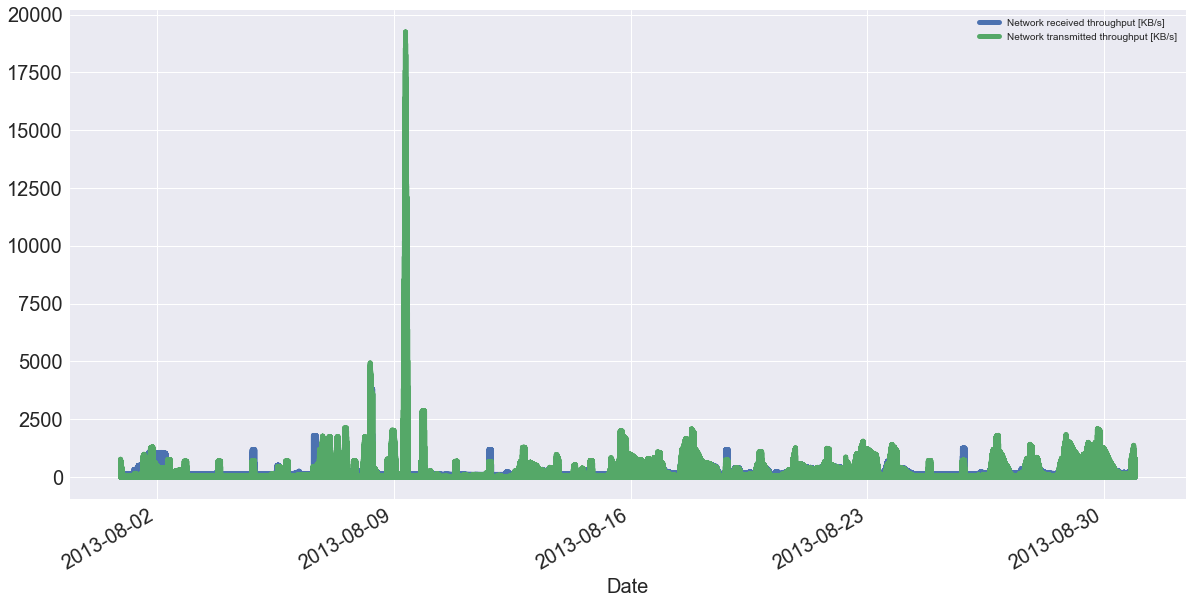

In [52]:
df_rm = pd.concat([receive.rolling(24).mean(), transmit.rolling(24).mean()], axis=1)
df_rm.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20);


In [53]:
## Weekends are slower than weekdays. Throughput increases over the week
daysofweekavg = pd.pivot_table(concatenated_df, values = "Network transmitted throughput [KB/s]", 
                             columns = "weekday", index = "month")
daysofweekavg


weekday         0         1         2        3         4         5         6
month                                                                       
7             NaN       NaN  1.295914      NaN       NaN       NaN       NaN
8        3.579602  5.204493  4.254630  5.88706  4.658481  1.940974  2.071505

In [54]:
## Weekends are slower than weekdays. Throughput increases until Thursday, Friday is lower
daysofweekavg = pd.pivot_table(concatenated_df, values = "Network received throughput [KB/s]", 
                             columns = "weekday", index = "month")
daysofweekavg


weekday         0         1         2         3         4         5         6
month                                                                        
7             NaN       NaN  5.609041       NaN       NaN       NaN       NaN
8        5.930726  6.512482  5.755034  7.420822  7.018265  4.090643  4.373224

In [55]:
#Again, weekends are not used much
weekendavg = pd.pivot_table(concatenated_df, values = "Network transmitted throughput [KB/s]", 
                             columns = "weekend", index = "month")
weekendavg

weekend       0.0       1.0
month                      
7        1.295914       NaN
8        4.766131  2.006419

In [56]:
#Again, weekends are not used much, Thursday and friday see greatest differences in KB transmitted
weekdiffs = pd.pivot_table(concatenated_df, values = "transmitted_diff", 
                             columns = "weekday", index = "month")
weekdiffs

weekday         0         1         2         3         4         5         6
month                                                                        
7             NaN       NaN -0.288603       NaN       NaN       NaN       NaN
8       -0.163218 -0.358954 -0.537941 -1.122937 -1.222301 -0.130533 -0.161905

In [57]:
cpu = concatenated_df[['CPU usage [%]']]
receive = concatenated_df[['Network received throughput [KB/s]']]
transmit = concatenated_df[['Network transmitted throughput [KB/s]']]

In [58]:
def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])

moving_average(cpu, 24) # prediction for the last observed day (past 24 hours)

2.1166666666666667

In [59]:
concatenated_df.describe()

CPU cores  CPU capacity provisioned [MHZ]  CPU usage [MHZ]  \
count  951325.000000                   951325.000000    951325.000000   
mean        2.879788                     7697.905875       392.823936   
std         1.400342                     3764.754207      1524.497247   
min         0.000000                        0.000000         0.000000   
25%         1.000000                     2925.999318        25.999997   
50%         4.000000                    10399.997204       150.799977   
75%         4.000000                    10399.998464       183.733284   
max         4.000000                    11704.001168     11454.312686   

       CPU usage [%]  Memory capacity provisioned [KB]  Memory usage [KB]  \
count  951325.000000                      9.513250e+05       9.513250e+05   
mean        4.211272                      6.238689e+06       2.400960e+05   
std        14.857056                      5.758387e+06       6.665058e+05   
min         0.000000                      0.000000e+00       0.000000e+00   
25%         1.000000                      2.105344e+06       4.403840e+04   
50%         1.516667                      3.024896e+06       1.230317e+05   
75%         1.816667                      8.357888e+06       2.013264e+05   
max       105.166667                      1.677722e+07       1.533437e+07   

       Disk read throughput [KB/s]  Disk write throughput [KB/s]  \
count                951325.000000                 951325.000000   
mean                      0.465415                      9.608719   
std                       9.677174                     20.086378   
min                       0.000000                      0.000000   
25%                       0.000000                      2.400000   
50%                       0.000000                      8.866667   
75%                       0.000000                     12.466667   
max                     979.133333                    995.533333   

       Network received throughput [KB/s]  \
count                       951325.000000   
mean                             5.953523   
std                             37.559201   
min                              0.000000   
25%                              0.000000   
50%                              1.000000   
75%                              4.533333   
max                            999.733333   

       Network transmitted throughput [KB/s]        weekday        weekend  \
count                          951325.000000  951325.000000  951325.000000   
mean                                4.017487       3.028997       0.267756   
std                                47.360707       1.943123       0.442790   
min                                 0.000000       0.000000       0.000000   
25%                                 0.000000       1.000000       0.000000   
50%                                 0.000000       3.000000       0.000000   
75%                                 0.200000       5.000000       1.000000   
max                              9429.600000       6.000000       1.000000   

               month            day  CPU usage prev       CPU_diff  \
count  951325.000000  951325.000000   951324.000000  951324.000000   
mean        7.997201      15.514101        4.214413      -0.003149   
std         0.052834       8.656623       14.857996       4.758139   
min         7.000000       1.000000        0.000000    -102.233333   
25%         8.000000       8.000000        1.000000      -0.050000   
50%         8.000000      16.000000        1.516667       0.000000   
75%         8.000000      23.000000        1.816667       0.050000   
max         8.000000      31.000000      105.166667     103.966667   

       received_prev  received_diff  transmitted_prev  transmitted_diff  
count  951324.000000  951324.000000     951324.000000     951324.000000  
mean        6.433888      -0.480371          4.584510         -0.567047  
std       102.640195      96.868200         94.901741         86.438924  
min       

## These graphs show the resampled hourly rates and usage. Resampling provides an easier way to visualize the data over time (compared to ms). Also, it helps us identify any trends in the data.

### These graphs seem to suggest we should standardize the data (log transform or z-score) to make sure they are on the same scale.

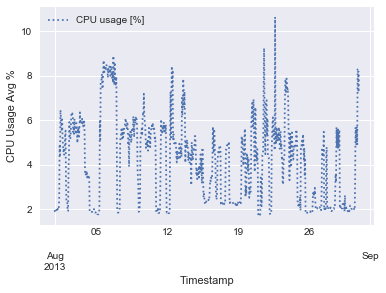

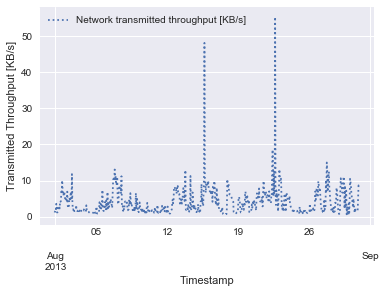

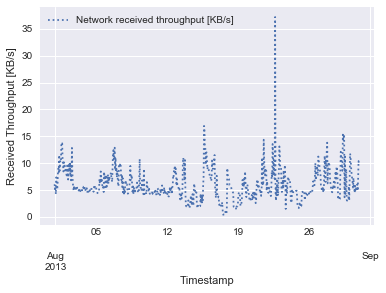

In [60]:
hourlycpu = cpu.resample('H').mean()
hourlycpu.plot(style=[':', '--', '-'])
plt.ylabel('CPU Usage Avg %');

hourlytransmit = transmit.resample('H').mean()
hourlytransmit.plot(style=[':', '--', '-'])
plt.ylabel('Transmitted Throughput [KB/s]');

hourlyreceive = receive.resample('H').mean()
hourlyreceive.plot(style=[':', '--', '-'])
plt.ylabel('Received Throughput [KB/s]');

## A closer look at resampled hourly CPU usage % data to check for trends. Looks like late night and early AM have little CPU Usage.

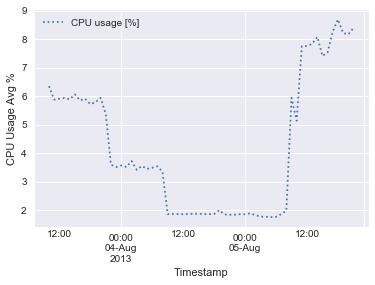

In [61]:
hourlycpu = cpu.resample('H').mean()
hourlycpu[60:120].plot(style=[':', '--', '-'])
plt.ylabel('CPU Usage Avg %');

In [62]:
hourlydat = concatenated_df.resample('H').mean()
#hourlydat.iloc[:,5:7].plot(style=[':', '--', '-'], figsize=(20,10), linewidth=3, fontsize=20)
#plt.ylabel('Resampled Data');


## plot log transformed values 

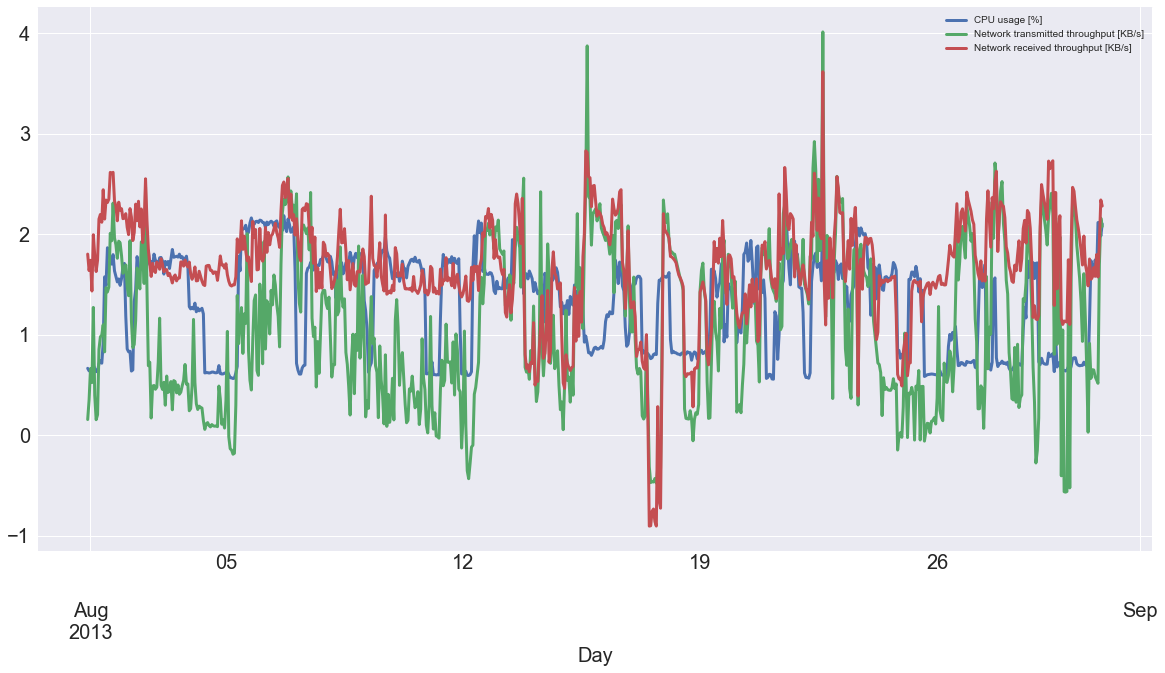

In [63]:
ts_logcpu = np.log(hourlycpu)
ts_logreceive = np.log(hourlyreceive)
ts_logtransmit = np.log(hourlytransmit)

newdf = ts_logcpu
newdf['Network transmitted throughput [KB/s]'] = ts_logtransmit
newdf['Network received throughput [KB/s]'] = ts_logreceive

ts_logcpu = np.log(hourlycpu)

newdf.plot(figsize=(20,10), linewidth=3, fontsize=20)
plt.xlabel('Day', fontsize=20);


CPU usage [%]  Network transmitted throughput [KB/s]  \
Timestamp                                                                   
2013-07-31 22:00:00       0.667108                               0.157372   
2013-07-31 23:00:00       0.641233                               0.351706   
2013-08-01 00:00:00       0.645691                               0.664127   
2013-08-01 01:00:00       0.646989                               0.524955   
2013-08-01 02:00:00       0.698113                               1.272634   

                     Network received throughput [KB/s]  
Timestamp                                                
2013-07-31 22:00:00                            1.802934  
2013-07-31 23:00:00                            1.639057  
2013-08-01 00:00:00                            1.741388  
2013-08-01 01:00:00                            1.435624  
2013-08-01 02:00:00                            1.995486

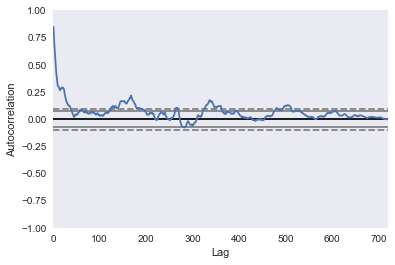

In [64]:
pd.plotting.autocorrelation_plot(newdf);
newdf.head()

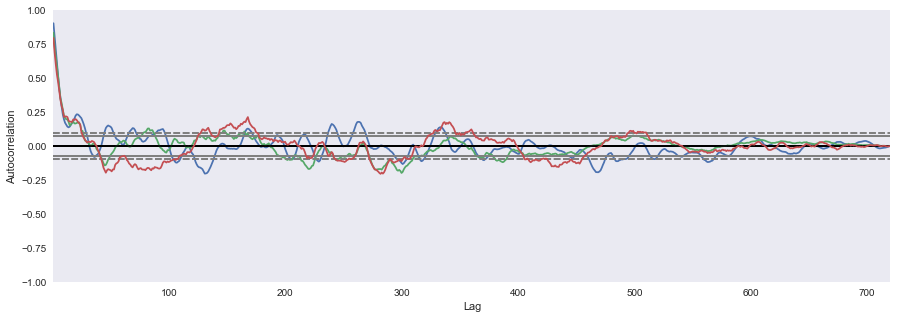

In [65]:
plt.figure(figsize=(15,5))
pd.plotting.autocorrelation_plot(ts_logcpu);
pd.plotting.autocorrelation_plot(ts_logreceive);
pd.plotting.autocorrelation_plot(ts_logtransmit);


In [66]:
hourlydat.head()

CPU cores  CPU capacity provisioned [MHZ]  \
Timestamp                                                        
2013-07-31 22:00:00   2.720721                     7288.268713   
2013-07-31 23:00:00   2.719760                     7285.930823   
2013-08-01 00:00:00   2.720721                     7288.268711   
2013-08-01 01:00:00   2.720721                     7288.268711   
2013-08-01 02:00:00   2.720721                     7288.268711   

                     CPU usage [MHZ]  CPU usage [%]  \
Timestamp                                             
2013-07-31 22:00:00       144.749254       1.948594   
2013-07-31 23:00:00       139.011605       1.898820   
2013-08-01 00:00:00       139.554275       1.907304   
2013-08-01 01:00:00       139.267614       1.909781   
2013-08-01 02:00:00       149.597077       2.009956   

                     Memory capacity provisioned [KB]  Memory usage [KB]  \
Timestamp                                                                  
2013-07-31 22:00:00                      6.625647e+06      173470.690562   
2013-07-31 23:00:00                      6.618029e+06      153909.232442   
2013-08-01 00:00:00                      6.625668e+06      155492.226970   
2013-08-01 01:00:00                      6.625690e+06      149326.597183   
2013-08-01 02:00:00                      6.625740e+06      173705.814443   

                     Disk read throughput [KB/s]  \
Timestamp                                          
2013-07-31 22:00:00                     1.252002   
2013-07-31 23:00:00                     0.946149   
2013-08-01 00:00:00                     0.463363   
2013-08-01 01:00:00                     0.594244   
2013-08-01 02:00:00                     1.870581   

                     Disk write throughput [KB/s]  \
Timestamp                                           
2013-07-31 22:00:00                     12.462153   
2013-07-31 23:00:00                     10.711247   
2013-08-01 00:00:00                     11.372364   
2013-08-01 01:00:00                      9.131714   
2013-08-01 02:00:00                     20.440995   

                     Network received throughput [KB/s]  \
Timestamp                                                 
2013-07-31 22:00:00                            6.067425   
2013-07-31 23:00:00                            5.150313   
2013-08-01 00:00:00                            5.705259   
2013-08-01 01:00:00                            4.202267   
2013-08-01 02:00:00                            7.355777   

                     Network transmitted throughput [KB/s]  weekday  weekend  \
Timestamp                                                                      
2013-07-31 22:00:00                               1.170431      2.0      0.0   
2013-07-31 23:00:00                               1.421491      2.0      0.0   
2013-08-01 00:00:00                               1.942793      3.0      0.0   
2013-08-01 01:00:00                               1.690383      3.0      0.0   
2013-08-01 02:00:00                               3.570245      3.0      0.0   

                     month   day  CPU usage prev  CPU_diff  received_prev  \
Timestamp                                                                   
2013-07-31 22:00:00    7.0  31.0        2.477869 -0.537403       6.387135   
2013-07-31 23:00:00    7.0  31.0        1.903890 -0.005070       5.257350   
2013-08-01 00:00:00    8.0   1.0        1.906805  0.000499       5.704108   
2013-08-01 01:00:00    8.0   1.0        1.907770  0.002011       4.248699   
2013-08-01 02:00:00    8.0   1.0        2.010287 -0.000331       7.207093   

                     received_diff  transmitted_prev  transmitted_diff  
Timestamp                                                               
2013-07-31 22:00:00      -0.323416          1.726933         -0.576058  
2013-07-31 23:00:00      -0.107037          1.422640         -0.001148  
2013-08-01 00:00:00       0.001151          1.931235          0.011558  
2013-08-01 01:00:00   

In [67]:
list(hourlydat.columns.values)

['CPU cores',
 'CPU capacity provisioned [MHZ]',
 'CPU usage [MHZ]',
 'CPU usage [%]',
 'Memory capacity provisioned [KB]',
 'Memory usage [KB]',
 'Disk read throughput [KB/s]',
 'Disk write throughput [KB/s]',
 'Network received throughput [KB/s]',
 'Network transmitted throughput [KB/s]',
 'weekday',
 'weekend',
 'month',
 'day',
 'CPU usage prev',
 'CPU_diff',
 'received_prev',
 'received_diff',
 'transmitted_prev',
 'transmitted_diff']

In [68]:
hourlydat = hourlydat[['CPU capacity provisioned [MHZ]', 'CPU usage [MHZ]', 'CPU usage [%]','Memory capacity provisioned [KB]','Memory usage [KB]', 'Disk read throughput [KB/s]', 'Disk write throughput [KB/s]', 'Network received throughput [KB/s]', 'Network transmitted throughput [KB/s]','CPU usage prev', 'CPU_diff', 'received_prev', 'received_diff','transmitted_prev', 'transmitted_diff', 'weekday', 'weekend', 'month', 'day','CPU cores']]

In [69]:
hourlydatrest = hourlydat[hourlydat.columns[15:21]]

In [70]:
from scipy.stats import zscore
#remove first row with NA's from previous shift, that way we can get z scores
hourlydat = hourlydat.iloc[1:]
hourlydat = hourlydat[hourlydat.columns[0:15]].apply(zscore) 

In [71]:
hourlydat.head()

CPU capacity provisioned [MHZ]  CPU usage [MHZ]  \
Timestamp                                                              
2013-07-31 23:00:00                        -1.72131        -1.246953   
2013-08-01 00:00:00                        -1.71154        -1.244292   
2013-08-01 01:00:00                        -1.71154        -1.245698   
2013-08-01 02:00:00                        -1.71154        -1.195052   
2013-08-01 03:00:00                        -1.71154        -1.242901   

                     CPU usage [%]  Memory capacity provisioned [KB]  \
Timestamp                                                              
2013-07-31 23:00:00      -1.218452                          1.271275   
2013-08-01 00:00:00      -1.213992                          1.296784   
2013-08-01 01:00:00      -1.212690                          1.296856   
2013-08-01 02:00:00      -1.160026                          1.297023   
2013-08-01 03:00:00      -1.194985                          1.297096   

                     Memory usage [KB]  Disk read throughput [KB/s]  \
Timestamp                                                             
2013-07-31 23:00:00          -1.075108                     0.899311   
2013-08-01 00:00:00          -1.055395                    -0.004499   
2013-08-01 01:00:00          -1.132177                     0.240520   
2013-08-01 02:00:00          -0.828576                     2.629916   
2013-08-01 03:00:00          -1.031945                     0.938184   

                     Disk write throughput [KB/s]  \
Timestamp                                           
2013-07-31 23:00:00                      0.358150   
2013-08-01 00:00:00                      0.574200   
2013-08-01 01:00:00                     -0.158034   
2013-08-01 02:00:00                      3.537786   
2013-08-01 03:00:00                      1.311122   

                     Network received throughput [KB/s]  \
Timestamp                                                 
2013-07-31 23:00:00                           -0.273241   
2013-08-01 00:00:00                           -0.084835   
2013-08-01 01:00:00                           -0.595108   
2013-08-01 02:00:00                            0.475525   
2013-08-01 03:00:00                            0.013640   

                     Network transmitted throughput [KB/s]  CPU usage prev  \
Timestamp                                                                    
2013-07-31 23:00:00                              -0.672473       -1.217115   
2013-08-01 00:00:00                              -0.537580       -1.215583   
2013-08-01 01:00:00                              -0.602894       -1.215075   
2013-08-01 02:00:00                              -0.116459       -1.161175   
2013-08-01 03:00:00                              -0.654731       -1.195441   

                     CPU_diff  received_prev  received_diff  transmitted_prev  \
Timestamp                                                                       
2013-07-31 23:00:00 -0.021876      -0.182480       0.066661         -0.537739   
2013-08-01 00:00:00  0.022903      -0.113262       0.085998         -0.451576   
2013-08-01 01:00:00  0.035064      -0.338754       0.077493         -0.505521   
2013-08-01 02:00:00  0.016233       0.119600       0.112366         -0.159903   
2013-08-01 03:00:00  0.005581      -0.071014       0.089102         -0.527486   

                     transmitted_diff  
Timestamp                              
2013-07-31 23:00:00          0.125501  
2013-08-01 00:00:00          0.128272  
2013-08-01 01:00:00          0.142673  
2013-08-01 02:00:00          0.107719  
2013-08-01 03:00:00          0.127255

## Create DF with standardized z scores

In [72]:
hourlydatrest = hourlydatrest.iloc[1:]
standardizeddf = pd.concat([hourlydat, hourlydatrest], axis=1)


In [73]:
standardizeddf.describe()

CPU capacity provisioned [MHZ]  CPU usage [MHZ]  CPU usage [%]  \
count                    7.190000e+02     7.190000e+02   7.190000e+02   
mean                    -2.318343e-15     1.988828e-16   2.520006e-16   
std                      1.000696e+00     1.000696e+00   1.000696e+00   
min                     -2.318656e+00    -1.272445e+00  -1.297475e+00   
25%                     -7.793021e-01    -1.006844e+00  -1.039907e+00   
50%                      6.377421e-01     1.389584e-01   1.130341e-01   
75%                      6.377424e-01     6.427981e-01   6.810565e-01   
max                      1.233818e+00     3.267605e+00   3.380236e+00   

       Memory capacity provisioned [KB]  Memory usage [KB]  \
count                      7.190000e+02       7.190000e+02   
mean                       7.269722e-16       1.089377e-16   
std                        1.000696e+00       1.000696e+00   
min                       -2.394830e+00      -1.496564e+00   
25%                       -9.012083e-01      -8.146984e-01   
50%                       -1.343825e-01      -1.296863e-01   
75%                        6.142217e-01       5.613254e-01   
max                        1.859416e+00       4.083016e+00   

       Disk read throughput [KB/s]  Disk write throughput [KB/s]  \
count                 7.190000e+02                  7.190000e+02   
mean                 -3.202121e-17                  1.088605e-16   
std                   1.000696e+00                  1.000696e+00   
min                  -8.190033e-01                 -1.955405e+00   
25%                  -4.513068e-01                 -8.934803e-01   
50%                  -2.363998e-01                  2.882033e-01   
75%                   5.593600e-02                  5.850421e-01   
max                   9.839379e+00                  4.742503e+00   

       Network received throughput [KB/s]  \
count                        7.190000e+02   
mean                         7.133839e-17   
std                          1.000696e+00   
min                         -1.884093e+00   
25%                         -5.448646e-01   
50%                         -2.375451e-01   
75%                          4.809994e-01   
max                          1.061171e+01   

       Network transmitted throughput [KB/s]  CPU usage prev      CPU_diff  \
count                           7.190000e+02    7.190000e+02  7.190000e+02   
mean                           -8.461783e-17   -2.970889e-16  1.337595e-17   
std                             1.000696e+00    1.000696e+00  1.000696e+00   
min                            -8.932093e-01   -1.298730e+00 -3.918962e+00   
25%                            -6.297833e-01   -1.042996e+00 -2.541536e-01   
50%                            -3.101997e-01    1.165446e-01  1.623294e-02   
75%                             4.393392e-01    7.069197e-01  2.434930e-01   
max                             1.327081e+01    3.078413e+00  4.620455e+00   

       received_prev  received_diff  transmitted_prev  transmitted_diff  \
count   7.190000e+02   7.190000e+02      7.190000e+02      7.190000e+02   
mean    7.257369e-18   2.661679e-17     -4.061038e-17      4.072619e-18   
std     1.000696e+00   1.000696e+00      1.000696e+00      1.000696e+00   
min    -9.341282e-01  -2.583687e+01     -6.824634e-01     -1.896039e+01   
25%    -3.159670e-01   6.558590e-02     -5.089417e-01      1.027909e-01   
50%    -1.573389e-01   8.253600e-02     -2.435057e-01      1.235675e-01   
75%     2.007692e-01   9.492063e-02      2.559366e-01      1.316141e-01   
max     2.292069e+01   7.824441e-01      1.460541e+01      1.320583e+00   

          weekday     weekend       month         day   CPU cores  
count  719.000000  719.000000  719.000000  719.000000  719.000000  
mean     3.029207    0.267038    7.998609   15.481224    2.879801  
std      1.942913    0.442720    0.037294    8.652974    0.091935  
min      0.000000    0.000000    7.000000    1.000000    2.675991  
25%      1.000000    0.000000    8.000000    8.00000

In [74]:
list(standardizeddf.columns.values)
standardizeddf = standardizeddf[['CPU usage [MHZ]', 'CPU usage [%]','Memory usage [KB]', 'Disk read throughput [KB/s]', 'Disk write throughput [KB/s]', 'Network received throughput [KB/s]', 'Network transmitted throughput [KB/s]','CPU capacity provisioned [MHZ]','Memory capacity provisioned [KB]','CPU usage prev', 'CPU_diff', 'received_prev', 'received_diff','transmitted_prev', 'transmitted_diff', 'weekday', 'weekend', 'month', 'day','CPU cores']]

In [75]:
standardizeddf.head()

CPU usage [MHZ]  CPU usage [%]  Memory usage [KB]  \
Timestamp                                                                
2013-07-31 23:00:00        -1.246953      -1.218452          -1.075108   
2013-08-01 00:00:00        -1.244292      -1.213992          -1.055395   
2013-08-01 01:00:00        -1.245698      -1.212690          -1.132177   
2013-08-01 02:00:00        -1.195052      -1.160026          -0.828576   
2013-08-01 03:00:00        -1.242901      -1.194985          -1.031945   

                     Disk read throughput [KB/s]  \
Timestamp                                          
2013-07-31 23:00:00                     0.899311   
2013-08-01 00:00:00                    -0.004499   
2013-08-01 01:00:00                     0.240520   
2013-08-01 02:00:00                     2.629916   
2013-08-01 03:00:00                     0.938184   

                     Disk write throughput [KB/s]  \
Timestamp                                           
2013-07-31 23:00:00                      0.358150   
2013-08-01 00:00:00                      0.574200   
2013-08-01 01:00:00                     -0.158034   
2013-08-01 02:00:00                      3.537786   
2013-08-01 03:00:00                      1.311122   

                     Network received throughput [KB/s]  \
Timestamp                                                 
2013-07-31 23:00:00                           -0.273241   
2013-08-01 00:00:00                           -0.084835   
2013-08-01 01:00:00                           -0.595108   
2013-08-01 02:00:00                            0.475525   
2013-08-01 03:00:00                            0.013640   

                     Network transmitted throughput [KB/s]  \
Timestamp                                                    
2013-07-31 23:00:00                              -0.672473   
2013-08-01 00:00:00                              -0.537580   
2013-08-01 01:00:00                              -0.602894   
2013-08-01 02:00:00                              -0.116459   
2013-08-01 03:00:00                              -0.654731   

                     CPU capacity provisioned [MHZ]  \
Timestamp                                             
2013-07-31 23:00:00                        -1.72131   
2013-08-01 00:00:00                        -1.71154   
2013-08-01 01:00:00                        -1.71154   
2013-08-01 02:00:00                        -1.71154   
2013-08-01 03:00:00                        -1.71154   

                     Memory capacity provisioned [KB]  CPU usage prev  \
Timestamp                                                               
2013-07-31 23:00:00                          1.271275       -1.217115   
2013-08-01 00:00:00                          1.296784       -1.215583   
2013-08-01 01:00:00                          1.296856       -1.215075   
2013-08-01 02:00:00                          1.297023       -1.161175   
2013-08-01 03:00:00                          1.297096       -1.195441   

                     CPU_diff  received_prev  received_diff  transmitted_prev  \
Timestamp                                                                       
2013-07-31 23:00:00 -0.021876      -0.182480       0.066661         -0.537739   
2013-08-01 00:00:00  0.022903      -0.113262       0.085998         -0.451576   
2013-08-01 01:00:00  0.035064      -0.338754       0.077493         -0.505521   
2013-08-01 02:00:00  0.016233       0.119600       0.112366         -0.159903   
2013-08-01 03:00:00  0.005581      -0.071014       0.089102         -0.527486   

                     transmitted_diff  weekday  weekend  month   day  \
Timestamp                                                              
2013-07-31 23:00:00          0.125501      2.0      0.0    7.0  31.0   
2013-08-01 00:00:00          0.128272      3.0      0.0    8.0   1.0   
2013-08-01 01:00:00          0.142673      3.0      0.0    8.0   1.0   
2013-08-01 02:00:00          0.107719      3.0      0.0    8.0   1.0   
2013-08-01 03:00:0

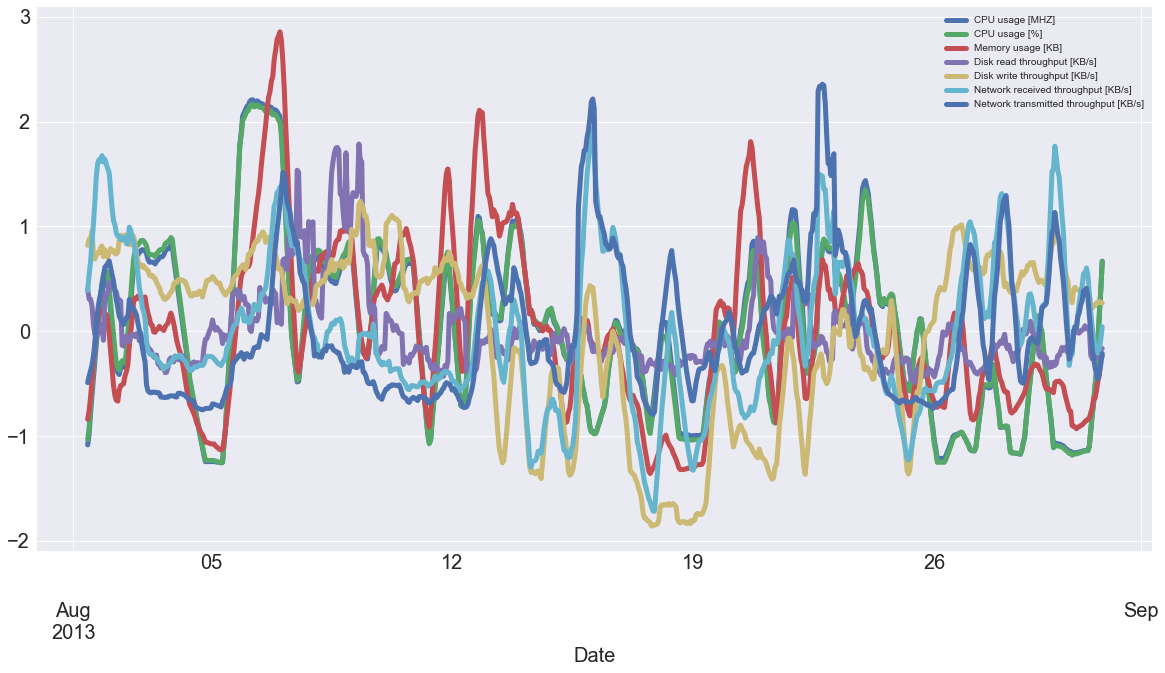

In [76]:
df_rm2 = standardizeddf.iloc[:,0:7].rolling(12).mean()
df_rm2.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20);


## Importing Forecast quality metrics

In [77]:

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])

def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

moving_average(standardizeddf['CPU usage [%]'], 24) # prediction for the last observed day (past 24 hours)


-0.23852889686196843

## plot moving averages, window = 24 (hours in a day). looks like this caught some anomalies

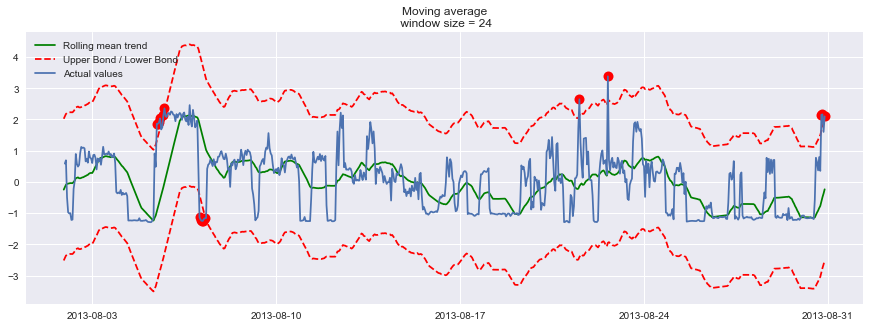

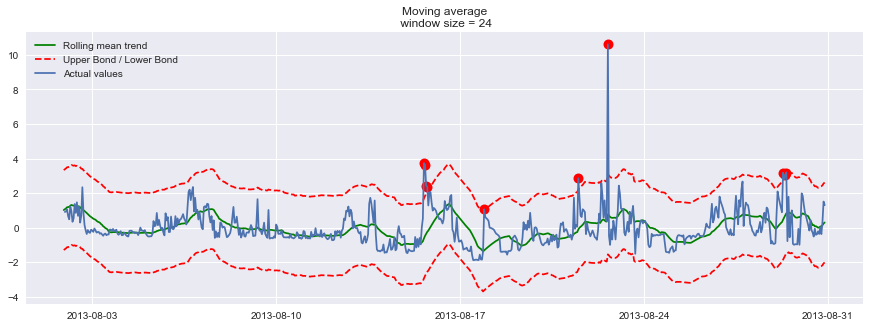

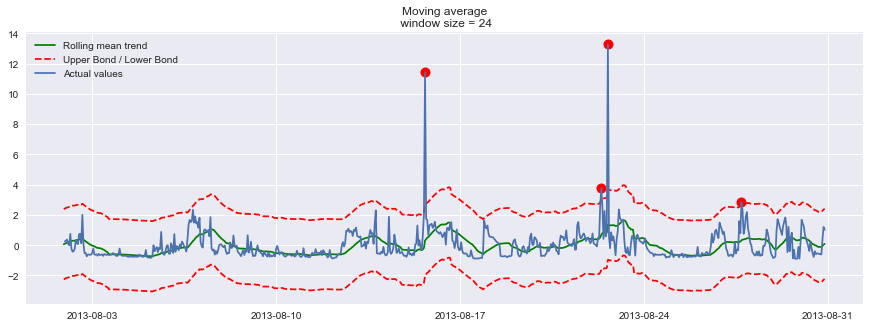

In [78]:
plotMovingAverage(standardizeddf[['CPU usage [%]']], 24, plot_intervals=True, plot_anomalies=True)


plotMovingAverage(standardizeddf[['Network received throughput [KB/s]']], 24, plot_intervals=True, plot_anomalies=True)


plotMovingAverage(standardizeddf[['Network transmitted throughput [KB/s]']], 24, plot_intervals=True, plot_anomalies=True)

## Have a look at correlations in data. Might help us reduce features in the model.

In [79]:
concatenated_df.corr()

CPU cores  \
CPU cores                               1.000000   
CPU capacity provisioned [MHZ]          0.993324   
CPU usage [MHZ]                         0.166247   
CPU usage [%]                           0.128036   
Memory capacity provisioned [KB]        0.429531   
Memory usage [KB]                       0.107773   
Disk read throughput [KB/s]            -0.023724   
Disk write throughput [KB/s]            0.078093   
Network received throughput [KB/s]      0.074515   
Network transmitted throughput [KB/s]   0.028615   
weekday                                 0.000864   
weekend                                -0.000078   
month                                   0.006037   
day                                     0.047405   
CPU usage prev                          0.127945   
CPU_diff                                0.000260   
received_prev                           0.023711   
received_diff                           0.003768   
transmitted_prev                        0.009347   
transmitted_diff                        0.005417   

                                       CPU capacity provisioned [MHZ]  \
CPU cores                                                    0.993324   
CPU capacity provisioned [MHZ]                               1.000000   
CPU usage [MHZ]                                              0.162647   
CPU usage [%]                                                0.122725   
Memory capacity provisioned [KB]                             0.483497   
Memory usage [KB]                                            0.107502   
Disk read throughput [KB/s]                                 -0.022604   
Disk write throughput [KB/s]                                 0.076087   
Network received throughput [KB/s]                           0.069404   
Network transmitted throughput [KB/s]                        0.025400   
weekday                                                      0.000918   
weekend                                                      0.000126   
month                                                        0.005781   
day                                                          0.045830   
CPU usage prev                                               0.122642   
CPU_diff                                                     0.000239   
received_prev                                                0.022037   
received_diff                                                0.003560   
transmitted_prev                                             0.007590   
transmitted_diff                                             0.005584   

                                       CPU usage [MHZ]  CPU usage [%]  \
CPU cores                                     0.166247       0.128036   
CPU capacity provisioned [MHZ]                0.162647       0.122725   
CPU usage [MHZ]                               1.000000       0.984028   
CPU usage [%]                                 0.984028       1.000000   
Memory capacity provisioned [KB]              0.317734       0.301554   
Memory usage [KB]                             0.577236       0.585211   
Disk read throughput [KB/s]                   0.014147       0.017348   
Disk write throughput [KB/s]                  0.032874       0.048547   
Network received throughput [KB/s]            0.059105       0.057991   
Network transmitted throughput [KB/s]         0.085453       0.091118   
weekday                                      -0.018067      -0.016326   
weekend                                      -0.015652      -0.014762   
month                                         0.008721       0.008158   
day                                          -0.039839      -0.040666   
CPU usage prev                                0.932081       0.948720   
CPU_diff                                      0.162019       0.159934   
received_prev                                 0.034160       0.033031   
received_diff                                -0.013278      -0.012514   
transmitted_prev         

In [80]:
#concatenated_df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
#plt.xlabel('TIME', fontsize=20);

# Establish Stationarity 
## Difference data to help establish stationarity (an assumption in time series)

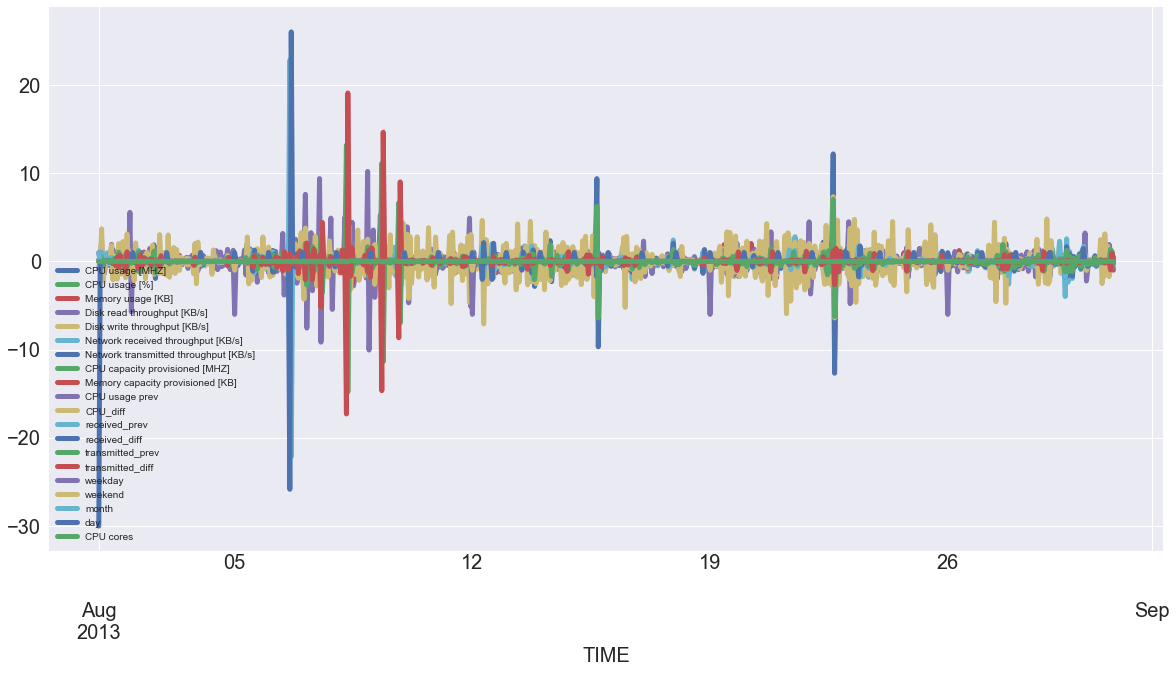

In [81]:
standardizeddf.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('TIME', fontsize=20);

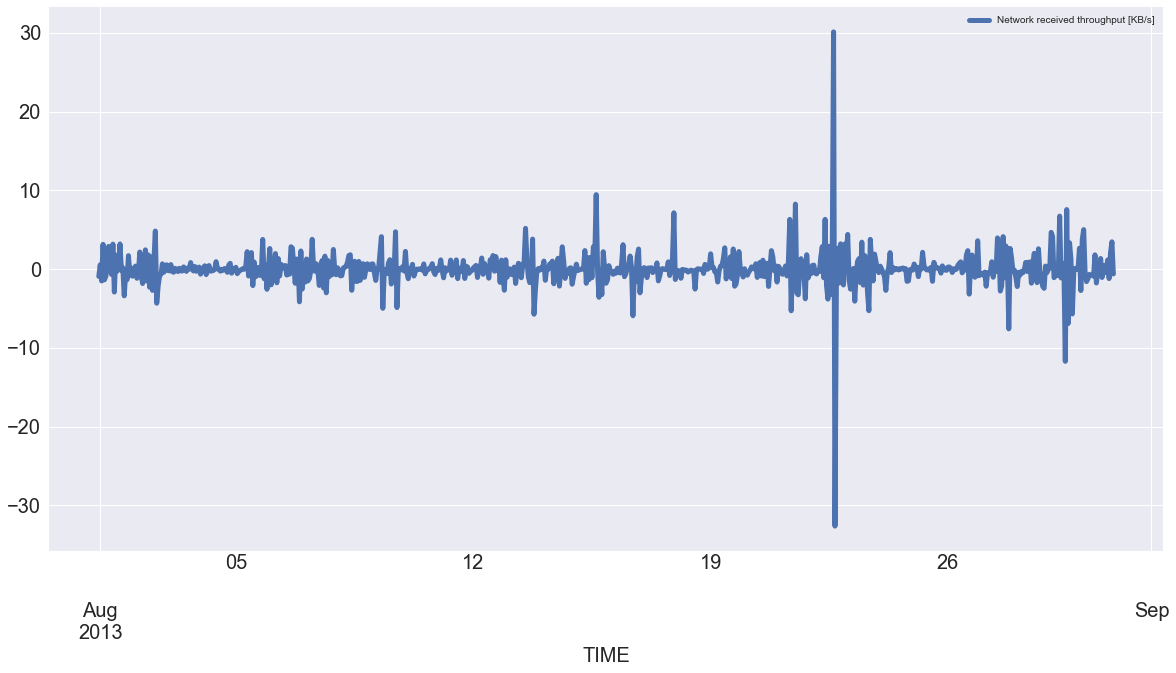

In [82]:
hourlyreceive.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('TIME', fontsize=20);

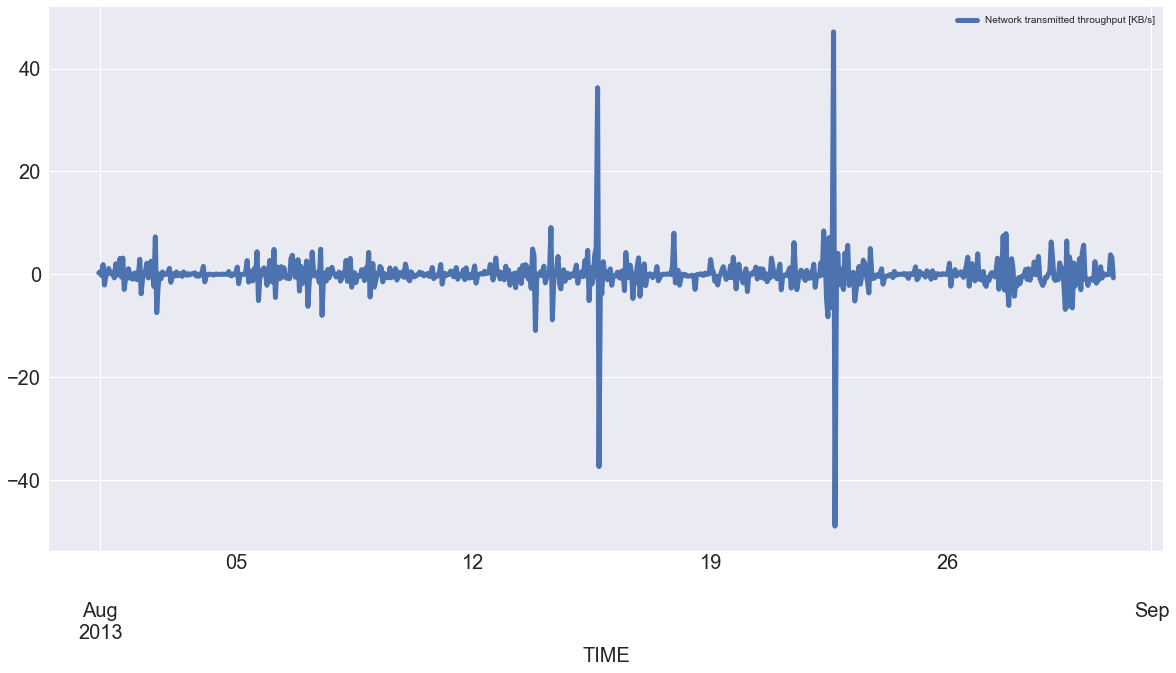

In [83]:
hourlytransmit.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('TIME', fontsize=20);

In [84]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

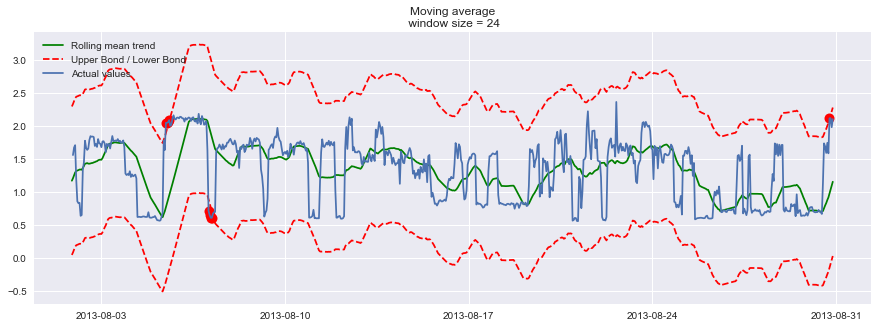

In [85]:
plotMovingAverage(ts_logcpu, 24, plot_intervals=True, plot_anomalies=True)

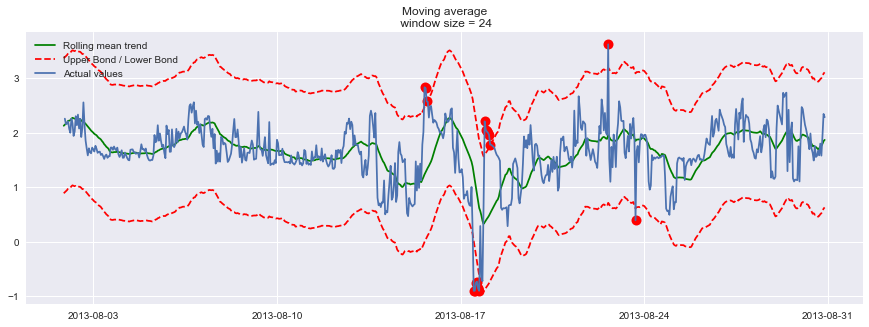

In [86]:
plotMovingAverage(ts_logreceive, 24, plot_intervals=True, plot_anomalies=True)

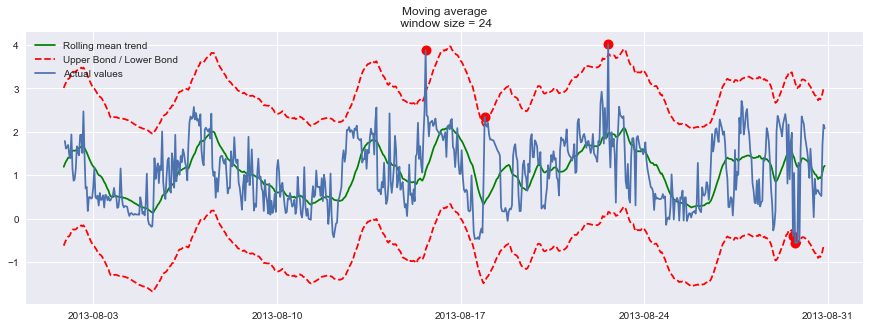

In [87]:
plotMovingAverage(ts_logtransmit, 24, plot_intervals=True, plot_anomalies=True)

In [88]:
#hourly_moving_avg_diff = ts_logcpu - moving_avg
#ts_log_moving_avg_diff.dropna(inplace=True)
#ts_log_moving_avg_diff.head(12)

## Augmented Dickey-Fuller Test
Time Series models are described in terms of autoregressive (AR) lags. So an AR(1) model states that the value at Yt depends on the value at Yt-1. So we can represent the time series as a model:

Yt = Alpha + Rho*Yt-1 + Errort

It turns out, a time series is perfectly stationary when Rho = 0. This makes intuitive sense: The time series will not depend on its previous value when Rho is 0, so it depends entirely on error and is equivalent to a random walk. A time series is perfectly non-stationary if Rho = 1. Alpha is a coeffecient that we want to estimate such that the Error term is minimized, but let's worry about that later.

The Dickey-Fuller Test asks if Rho in an AR(1) model is equal to 0 (H0: Rho=1, H1: Rho<1)

The augmented Dickey-Fuller Test just expands this to work for AR(n) models

A p-value < 0.05 indicates that your time series IS STATIONARY.

In [89]:
from statsmodels.tsa.stattools import adfuller

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [90]:
dftest = adfuller(standardizeddf['Network received throughput [KB/s]'], autolag='AIC')

# the statsmodels output is ugly and unlabeled, lets use a function to format it nicely
def adf_output(dftest):
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# of Lags Used','Number of Observations Used'])

    # the last element is a dictionary to unpack
    for key,value in dftest[4].items(): 
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
adf_output(dftest)

Test Statistic                -6.771395e+00
p-value                        2.636291e-09
# of Lags Used                 6.000000e+00
Number of Observations Used    7.120000e+02
Critical Value (1%)           -3.439568e+00
Critical Value (5%)           -2.865608e+00
Critical Value (10%)          -2.568936e+00
dtype: float64


In [91]:
dftest = adfuller(standardizeddf['Network transmitted throughput [KB/s]'], autolag='AIC')

# the statsmodels output is ugly and unlabeled, lets use a function to format it nicely
def adf_output(dftest):
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# of Lags Used','Number of Observations Used'])

    # the last element is a dictionary to unpack
    for key,value in dftest[4].items(): 
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
adf_output(dftest)

Test Statistic                -6.673606e+00
p-value                        4.522897e-09
# of Lags Used                 4.000000e+00
Number of Observations Used    7.140000e+02
Critical Value (1%)           -3.439542e+00
Critical Value (5%)           -2.865596e+00
Critical Value (10%)          -2.568930e+00
dtype: float64


In [92]:
dftest = adfuller(standardizeddf['Network received throughput [KB/s]'], autolag='AIC')

# the statsmodels output is ugly and unlabeled, lets use a function to format it nicely
def adf_output(dftest):
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# of Lags Used','Number of Observations Used'])

    # the last element is a dictionary to unpack
    for key,value in dftest[4].items(): 
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
adf_output(dftest)

Test Statistic                -6.771395e+00
p-value                        2.636291e-09
# of Lags Used                 6.000000e+00
Number of Observations Used    7.120000e+02
Critical Value (1%)           -3.439568e+00
Critical Value (5%)           -2.865608e+00
Critical Value (10%)          -2.568936e+00
dtype: float64


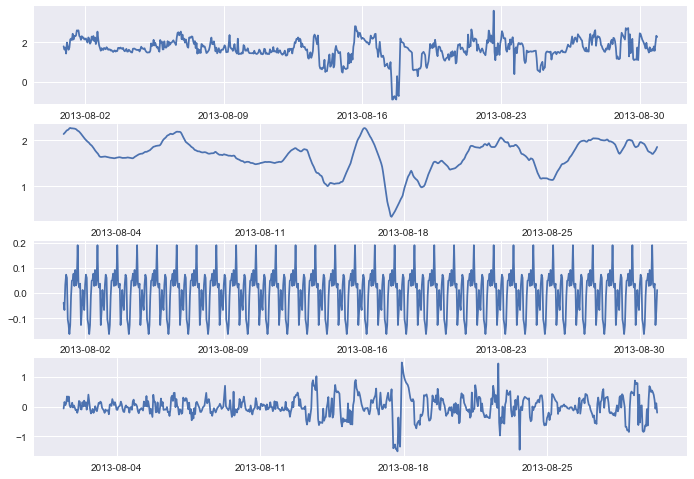

In [93]:
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(ts_logreceive['Network received throughput [KB/s]'], model="additive")

plt.figure(figsize=(15,5))
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
fig.set_size_inches(11.7, 8.27)

ax1.plot(ts_logreceive['Network received throughput [KB/s]'])
ax2.plot(decomp.trend)
ax3.plot(decomp.seasonal)
ax4.plot(decomp.resid)
sns.despine()

In [94]:
resid = decomp.resid.dropna()
decomp_adf = adfuller(resid, autolag='AIC')
adf_output(decomp_adf)

Test Statistic                -1.089072e+01
p-value                        1.227124e-19
# of Lags Used                 1.400000e+01
Number of Observations Used    6.810000e+02
Critical Value (1%)           -3.439989e+00
Critical Value (5%)           -2.865793e+00
Critical Value (10%)          -2.569035e+00
dtype: float64


Test Statistic                -1.198907e+01
p-value                        3.556041e-22
# of Lags Used                 8.000000e+00
Number of Observations Used    6.870000e+02
Critical Value (1%)           -3.439904e+00
Critical Value (5%)           -2.865756e+00
Critical Value (10%)          -2.569015e+00
dtype: float64


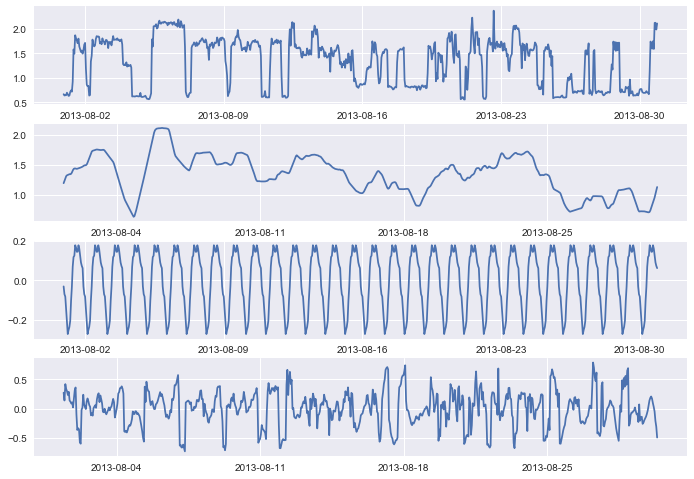

In [95]:
decomp = seasonal_decompose(ts_logcpu['CPU usage [%]'], model="additive")

plt.figure(figsize=(15,5))
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)

ax1.plot(ts_logcpu['CPU usage [%]'])
ax2.plot(decomp.trend)
ax3.plot(decomp.seasonal)
ax4.plot(decomp.resid)
fig.set_size_inches(11.7, 8.27)

sns.despine()

residcpu = decomp.resid.dropna()
decomp_adf_cpu = adfuller(residcpu, autolag='AIC')
adf_output(decomp_adf_cpu)

Test Statistic                -1.019534e+01
p-value                        6.167421e-18
# of Lags Used                 1.600000e+01
Number of Observations Used    6.790000e+02
Critical Value (1%)           -3.440017e+00
Critical Value (5%)           -2.865806e+00
Critical Value (10%)          -2.569042e+00
dtype: float64


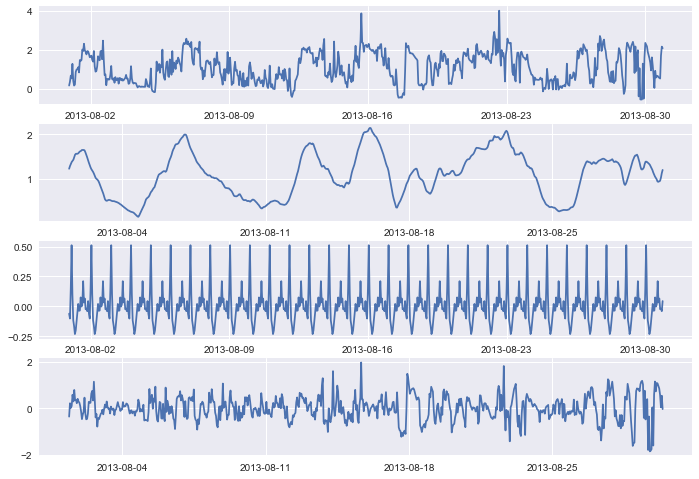

In [96]:
decomp = seasonal_decompose(ts_logtransmit['Network transmitted throughput [KB/s]'], model="additive")

plt.figure(figsize=(15,5))
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
fig.set_size_inches(11.7, 8.27)

ax1.plot(ts_logtransmit['Network transmitted throughput [KB/s]'])
ax2.plot(decomp.trend)
ax3.plot(decomp.seasonal)
ax4.plot(decomp.resid)
sns.despine()

residtrans = decomp.resid.dropna()
decomp_adftrans = adfuller(residtrans, autolag='AIC')
adf_output(decomp_adftrans)

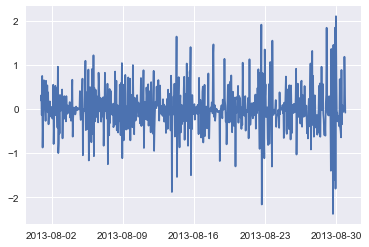

In [97]:
# construct difference curve and plot
diffed = ts_logtransmit['Network transmitted throughput [KB/s]'] - ts_logtransmit['Network transmitted throughput [KB/s]'].shift()
diffed.dropna(inplace=True)
plt.plot(diffed)
sns.despine()

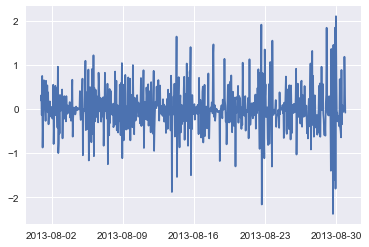

In [98]:
# construct difference curve and plot
diffed = ts_logtransmit['Network transmitted throughput [KB/s]'] - ts_logtransmit['Network transmitted throughput [KB/s]'].shift()
diffed.dropna(inplace=True)
plt.plot(diffed)
sns.despine()

Test Statistic                -9.767337e+00
p-value                        7.290341e-17
# of Lags Used                 1.600000e+01
Number of Observations Used    7.020000e+02
Critical Value (1%)           -3.439700e+00
Critical Value (5%)           -2.865666e+00
Critical Value (10%)          -2.568967e+00
dtype: float64


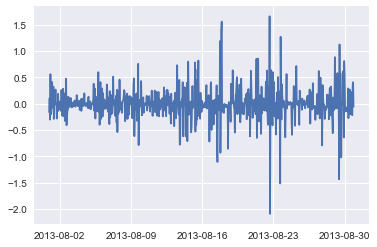

In [99]:
# construct difference curve and plot
diffed = ts_logreceive['Network received throughput [KB/s]'] - ts_logreceive['Network received throughput [KB/s]'].shift()
diffed.dropna(inplace=True)
plt.plot(diffed)
sns.despine()
diffed_adf = adfuller(diffed, autolag='AIC')
adf_output(diffed_adf)

Test Statistic                -9.538095e+00
p-value                        2.773597e-16
# of Lags Used                 1.800000e+01
Number of Observations Used    7.000000e+02
Critical Value (1%)           -3.439726e+00
Critical Value (5%)           -2.865678e+00
Critical Value (10%)          -2.568973e+00
dtype: float64


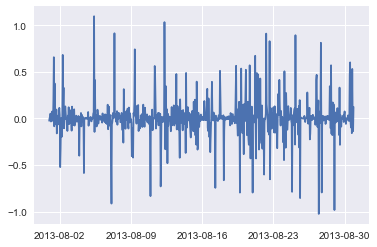

In [100]:
# construct difference curve and plot
diffed = ts_logcpu['CPU usage [%]'] - ts_logcpu['CPU usage [%]'].shift()
diffed.dropna(inplace=True)
plt.plot(diffed)
sns.despine()
diffed_adf = adfuller(diffed, autolag='AIC')
adf_output(diffed_adf)

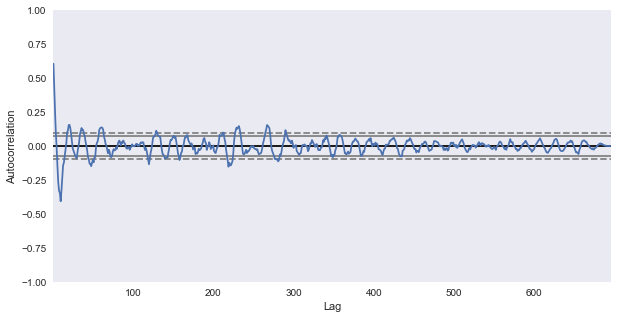

In [101]:
plt.figure(figsize=(10,5))
pd.plotting.autocorrelation_plot(residtrans);


In [104]:
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

%matplotlib inline

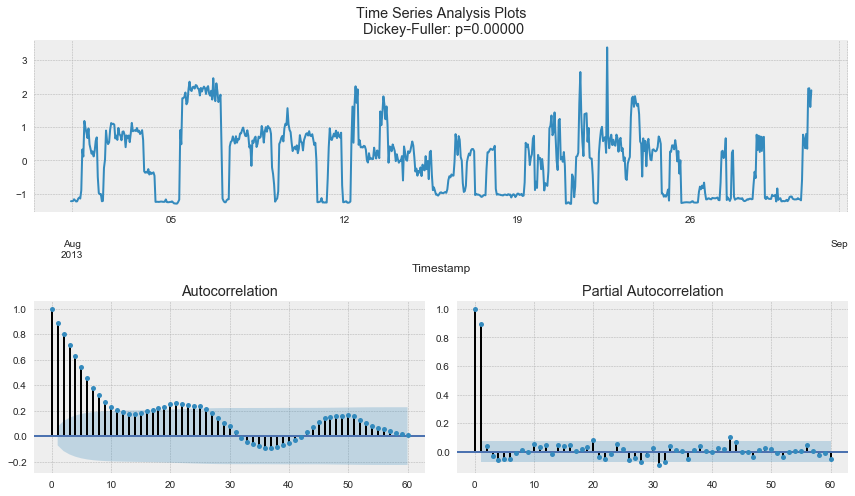

In [105]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(hourlydat['CPU usage [%]'], lags=60)

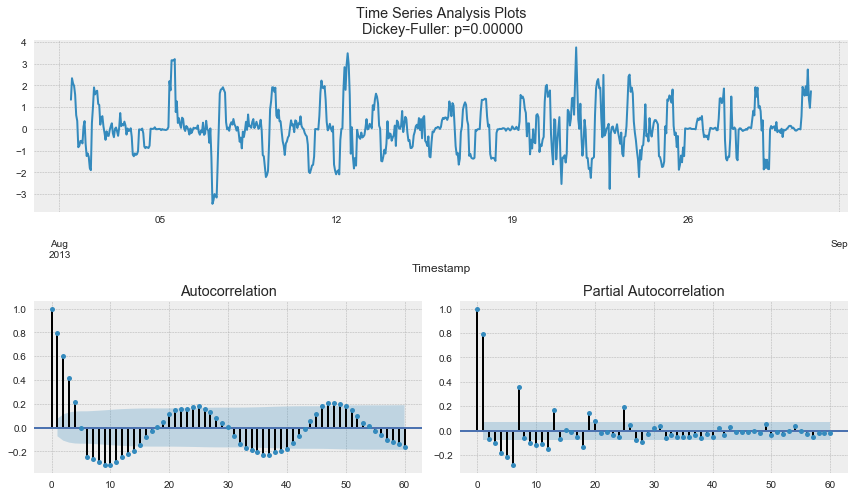

In [106]:
hourlydat_diff = hourlydat['CPU usage [%]'] - hourlydat['CPU usage [%]'].shift(6)
tsplot(hourlydat_diff[12:], lags=60)

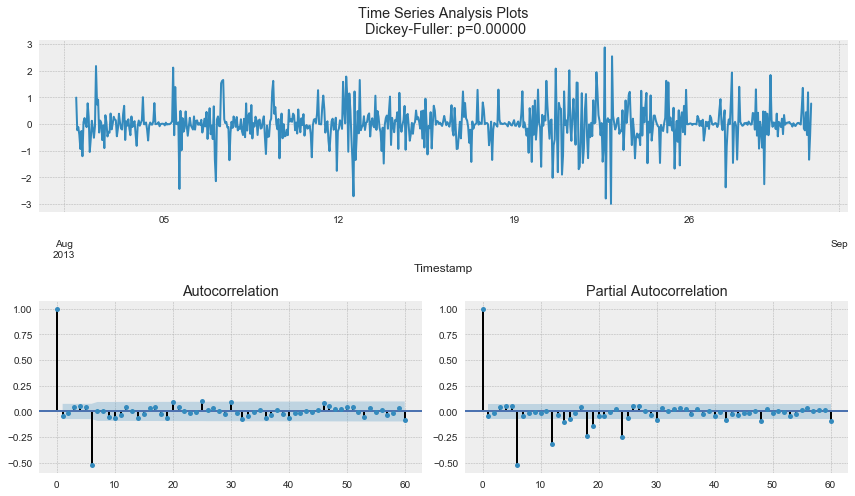

In [107]:
hourlydat_diff = hourlydat_diff - hourlydat_diff.shift(1)
tsplot(hourlydat_diff[12+1:], lags=60)

## MODELING

In [114]:

# Creating a copy of the initial datagrame to make various transformations 
data = pd.DataFrame(newdf.copy())
data.columns = ['CPU usage [%]']

# Adding the lag of the target variable from 6 steps back up to 24
for i in range(6, 25):
    data["lag_{}".format(i)] = data.y.shift(i)

ValueError: Length mismatch: Expected axis has 3 elements, new values have 1 elements

In [754]:

# setting initial values and some bounds for them
ps = range(5, 10)
d=1 
qs = range(5, 10)
Ps = range(0, 3)
D=1 
Qs = range(0, 5)
s = 12 # season length is still 24

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

375

In [753]:
def optimizeSARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(hourlydat['CPU usage [%]'], order=(param[0], d, param[1]), 
                                            seasonal_order=(param[3], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table
    

result_table = optimizeSARIMA(parameters_list, d, D, s)

HBox(children=(IntProgress(value=0, max=375), HTML(value='')))

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# for time-series cross-validation set 5 folds 
tscv = TimeSeriesSplit(n_splits=5)

def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');
    
    
y = data.dropna().y
X = data.dropna().drop(['y'], axis=1)

# reserve 30% of data for testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

# machine learning in two lines
lr = LinearRegression()
lr.fit(X_train, y_train)

plotModelResults(lr, plot_intervals=True)
plotCoefficients(lr)

NameError: name 'TimeSeriesSplit' is not defined

In [117]:
#from:https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-9-time-series-analysis-in-python-a270cb05e0b3
    
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
from sklearn.model_selection import TimeSeriesSplit # you have everything done for you

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

import warnings                                  # `do not disturb` mode
warnings.filterwarnings('ignore')

%matplotlib inline

In [118]:
from sklearn.model_selection import TimeSeriesSplit # you have everything done for you

def timeseriesCVscore(params, series, loss_function=mean_squared_error, slen=12):
    """
        Returns error on CV  
        
        params - vector of parameters for optimization
        series - dataset with timeseries
        slen - season length for Holt-Winters model
    """
    # errors array
    errors = []
    
    values = series.values
    alpha, beta, gamma = params
    
    # set the number of folds for cross-validation
    tscv = TimeSeriesSplit(n_splits=3) 
    
    # iterating over folds, train model on each, forecast and calculate error
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen=slen, 
                            alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()
        
        predictions = model.result[-len(test):]
        actual = values[test]
        error = loss_function(predictions, actual)
        errors.append(error)
        
    return np.mean(np.array(errors))

In [119]:
class HoltWinters:
    
    """
    Holt-Winters model with the anomalies detection using Brutlag method
    
    # series - initial time series
    # slen - length of a season
    # alpha, beta, gamma - Holt-Winters model coefficients
    # n_preds - predictions horizon
    # scaling_factor - sets the width of the confidence interval by Brutlag (usually takes values from 2 to 3)
    
    """
    
    
    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor
        
        
    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  
    
    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # let's calculate season averages
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # let's calculate initial values
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   

          
    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []
        
        seasonals = self.initial_seasonal_components()
        
        for i in range(len(self.series)+self.n_preds):
            if i == 0: # components initialization
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])
                
                self.PredictedDeviation.append(0)
                
                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                
                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                continue
                
            if i >= len(self.series): # predicting
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])
                
                # when predicting we increase uncertainty on each step
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 
                
            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])
                
                # Deviation is calculated according to Brutlag algorithm.
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])
                     
            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i%self.slen])

In [120]:
len(newdf['CPU usage [%]'])*.2

144.0

In [121]:
%%time
data = newdf[['CPU usage [%]']][:-144] # leave some data for testing

# initializing model parameters alpha, beta and gamma
x = [0, 0, 0] 

# Minimizing the loss function 
opt = minimize(timeseriesCVscore, x0=x, 
               args=(data, mean_squared_log_error), 
               method="TNC", bounds = ((0, 1), (0, 1), (0, 1))
              )

# Take optimal values...
alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

# ...and train the model with them, forecasting for the next 50 hours
model = HoltWinters(data, slen = 24, 
                    alpha = alpha_final, 
                    beta = beta_final, 
                    gamma = gamma_final, 
                    n_preds = 50, scaling_factor = 3)
model.triple_exponential_smoothing()

0.01524095593528163 0.026923775123866178 4.806023379266833e-08


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [122]:
data.head()

CPU usage [%]
Timestamp                         
2013-07-31 22:00:00       0.667108
2013-07-31 23:00:00       0.641233
2013-08-01 00:00:00       0.645691
2013-08-01 01:00:00       0.646989
2013-08-01 02:00:00       0.698113

ValueError: min() arg is an empty sequence

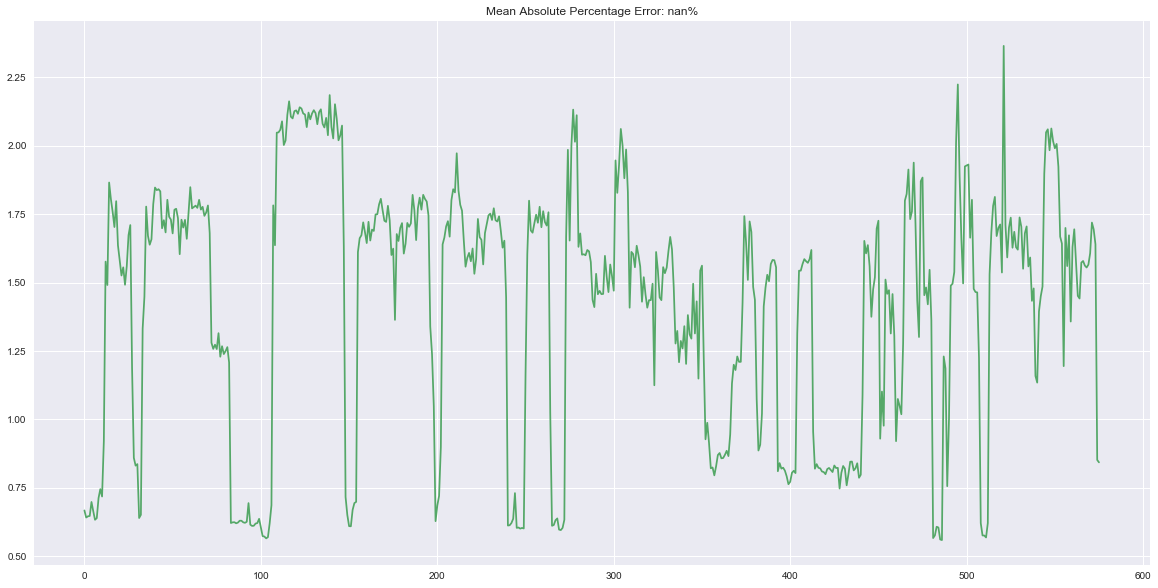

In [123]:
def plotHoltWinters(series, plot_intervals=False, plot_anomalies=False):
    """
        series - dataset with timeseries
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    
    plt.figure(figsize=(20, 10))
    plt.plot(model.result, label = "Model")
    plt.plot(series.values, label = "Actual")
    error = mean_absolute_percentage_error(series.values, model.result[:len(series)])
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    
    if plot_anomalies:
        anomalies = np.array([np.NaN]*len(series))
        anomalies[series.values<model.LowerBond[:len(series)]] = \
            series.values[series.values<model.LowerBond[:len(series)]]
        anomalies[series.values>model.UpperBond[:len(series)]] = \
            series.values[series.values>model.UpperBond[:len(series)]]
        plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    if plot_intervals:
        plt.plot(model.UpperBond, "r--", alpha=0.5, label = "Up/Low confidence")
        plt.plot(model.LowerBond, "r--", alpha=0.5)
        plt.fill_between(x=range(0,len(model.result)), y1=model.UpperBond, 
                         y2=model.LowerBond, alpha=0.2, color = "grey")    
        
    plt.vlines(len(series), ymin=min(model.LowerBond), ymax=max(model.UpperBond), linestyles='dashed')
    plt.axvspan(len(series)-20, len(model.result), alpha=0.3, color='lightgrey')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc="best", fontsize=13);
    
plotHoltWinters(data)
#plotHoltWinters(hourlydat['CPU usage [%]'], plot_intervals=True, plot_anomalies=True)

                              ARMA Model Results                              
Dep. Variable:          CPU usage [%]   No. Observations:                  720
Model:                    ARMA(10, 0)   Log Likelihood                 119.132
Method:                       css-mle   S.D. of innovations              0.205
Date:                Tue, 12 Jun 2018   AIC                           -214.263
Time:                        07:26:22   BIC                           -159.312
Sample:                    07-31-2013   HQIC                          -193.049
                         - 08-30-2013                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.3277      0.068     19.555      0.000       1.195       1.461
ar.L1.CPU usage [%]      0.9462      0.037     25.430      0.000       0.873       1.019
ar.L2.CPU us

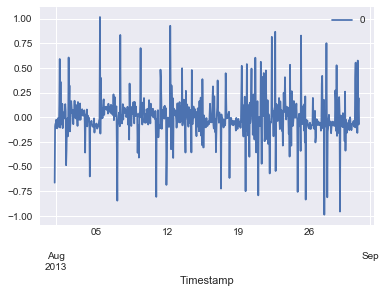

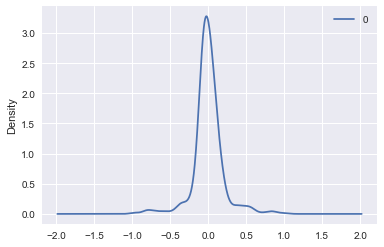

                0
count  720.000000
mean     0.000514
std      0.206174
min     -0.984806
25%     -0.074913
50%     -0.009662
75%      0.074719
max      1.017808


In [124]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
 
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
# fit model
model = ARIMA(newdf['CPU usage [%]'], order=(10,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()

#mean is pretty close to 0
print(residuals.describe())

In [780]:
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
X = newdf['CPU usage [%]']
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(10,0,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


predicted=1.867509, expected=1.883459
predicted=1.858437, expected=1.453969
predicted=1.423146, expected=1.488065
predicted=1.501614, expected=1.420526
predicted=1.422015, expected=1.546662
predicted=1.547450, expected=1.362584
predicted=1.321421, expected=0.570185
predicted=0.561902, expected=0.575799
predicted=0.654117, expected=0.607549
predicted=0.634774, expected=0.604682
predicted=0.633980, expected=0.561126
predicted=0.588086, expected=0.563554
predicted=0.653359, expected=1.230111
predicted=1.376028, expected=1.187834
predicted=1.226397, expected=0.755942
predicted=0.805246, expected=1.019406
predicted=1.110960, expected=1.488737
predicted=1.544083, expected=1.495987
predicted=1.468212, expected=1.538708
predicted=1.524951, expected=2.010007
predicted=2.084912, expected=2.224005
predicted=2.220973, expected=1.889935
predicted=1.821720, expected=1.662801
predicted=1.668473, expected=1.497161
predicted=1.492385, expected=1.924728
predicted=1.875562, expected=1.928066
predicted=1.

predicted=0.812399, expected=0.756876
predicted=0.813308, expected=0.759609
predicted=0.829060, expected=0.753970
predicted=0.827359, expected=0.760985
predicted=0.815638, expected=0.745047
predicted=0.820558, expected=0.748797
predicted=0.816090, expected=0.746394
predicted=0.813269, expected=0.762754
predicted=0.828411, expected=0.782185
predicted=0.846688, expected=0.772073
predicted=0.837238, expected=0.716577
predicted=0.785177, expected=0.698447
predicted=0.766559, expected=0.691997
predicted=0.758040, expected=0.695658
predicted=0.758928, expected=0.695903
predicted=0.762786, expected=0.728208
predicted=0.795538, expected=0.703687
predicted=0.771444, expected=0.693517
predicted=0.762040, expected=0.667378
predicted=0.738901, expected=1.139763
predicted=1.182962, expected=1.737586
predicted=1.751158, expected=1.690649
predicted=1.707318, expected=1.592458
predicted=1.637929, expected=1.744968
predicted=1.771534, expected=1.586502
predicted=1.559802, expected=2.116785
predicted=2.

In [781]:
#predictionsdf=pd.DataFrame(predictions) 

In [782]:
testnew = test

In [783]:
testnew= testnew.reset_index(drop = True)

In [784]:
prednew = pd.Series( (v[0] for v in predictions) )
prednew.head()

0    1.867509
1    1.858437
2    1.423146
3    1.501614
4    1.422015
dtype: float64

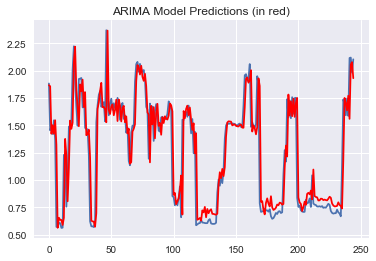

In [785]:
pyplot.plot(testnew)
pyplot.plot(prednew, color='red')
pyplot.title("ARIMA Model Predictions (in red)")
pyplot.show()


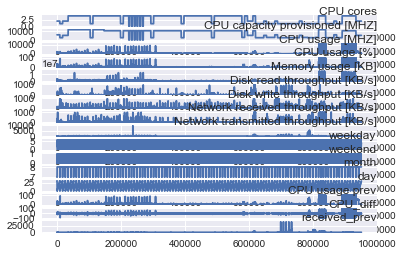

In [175]:


from pandas import read_csv
from matplotlib import pyplot
# load dataset
values = concatenated_df.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(concatenated_df.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()


In [177]:
from sklearn.preprocessing import LabelEncoder

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
# put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
values = concatenated_df.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [178]:
concatenated_dfcomp.info()

NameError: name 'concatenated_dfcomp' is not defined

In [179]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput) 


In [180]:
hourlydat.head()

CPU capacity provisioned [MHZ]  CPU usage [MHZ]  \
Timestamp                                                              
2013-07-31 23:00:00                        -1.72131        -1.246953   
2013-08-01 00:00:00                        -1.71154        -1.244292   
2013-08-01 01:00:00                        -1.71154        -1.245698   
2013-08-01 02:00:00                        -1.71154        -1.195052   
2013-08-01 03:00:00                        -1.71154        -1.242901   

                     CPU usage [%]  Memory capacity provisioned [KB]  \
Timestamp                                                              
2013-07-31 23:00:00      -1.218452                          1.271275   
2013-08-01 00:00:00      -1.213992                          1.296784   
2013-08-01 01:00:00      -1.212690                          1.296856   
2013-08-01 02:00:00      -1.160026                          1.297023   
2013-08-01 03:00:00      -1.194985                          1.297096   

                     Memory usage [KB]  Disk read throughput [KB/s]  \
Timestamp                                                             
2013-07-31 23:00:00          -1.075108                     0.899311   
2013-08-01 00:00:00          -1.055395                    -0.004499   
2013-08-01 01:00:00          -1.132177                     0.240520   
2013-08-01 02:00:00          -0.828576                     2.629916   
2013-08-01 03:00:00          -1.031945                     0.938184   

                     Disk write throughput [KB/s]  \
Timestamp                                           
2013-07-31 23:00:00                      0.358150   
2013-08-01 00:00:00                      0.574200   
2013-08-01 01:00:00                     -0.158034   
2013-08-01 02:00:00                      3.537786   
2013-08-01 03:00:00                      1.311122   

                     Network received throughput [KB/s]  \
Timestamp                                                 
2013-07-31 23:00:00                           -0.273241   
2013-08-01 00:00:00                           -0.084835   
2013-08-01 01:00:00                           -0.595108   
2013-08-01 02:00:00                            0.475525   
2013-08-01 03:00:00                            0.013640   

                     Network transmitted throughput [KB/s]  CPU usage prev  \
Timestamp                                                                    
2013-07-31 23:00:00                              -0.672473       -1.217115   
2013-08-01 00:00:00                              -0.537580       -1.215583   
2013-08-01 01:00:00                              -0.602894       -1.215075   
2013-08-01 02:00:00                              -0.116459       -1.161175   
2013-08-01 03:00:00                              -0.654731       -1.195441   

                     CPU_diff  received_prev  received_diff  transmitted_prev  \
Timestamp                                                                       
2013-07-31 23:00:00 -0.021876      -0.182480       0.066661         -0.537739   
2013-08-01 00:00:00  0.022903      -0.113262       0.085998         -0.451576   
2013-08-01 01:00:00  0.035064      -0.338754       0.077493         -0.505521   
2013-08-01 02:00:00  0.016233       0.119600       0.112366         -0.159903   
2013-08-01 03:00:00  0.005581      -0.071014       0.089102         -0.527486   

                     transmitted_diff  
Timestamp                              
2013-07-31 23:00:00          0.125501  
2013-08-01 00:00:00          0.128272  
2013-08-01 01:00:00          0.142673  
2013-08-01 02:00:00          0.107719  
2013-08-01 03:00:00          0.127255

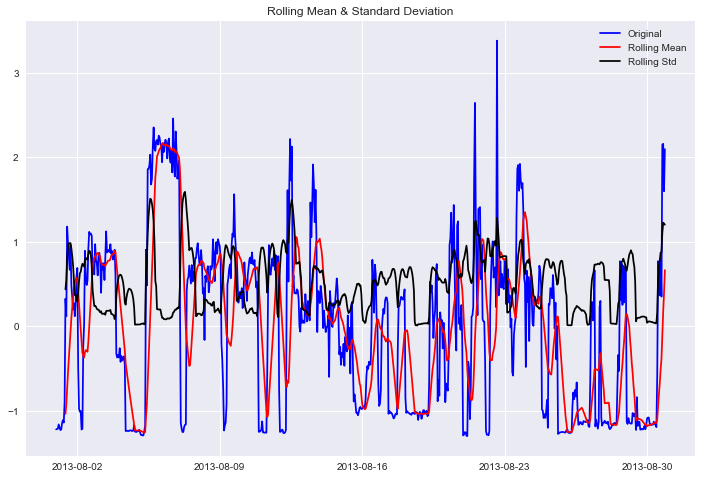

Results of Dickey-Fuller Test:
Test Statistic                -6.206498e+00
p-value                        5.641077e-08
#Lags Used                     0.000000e+00
Number of Observations Used    7.180000e+02
Critical Value (1%)           -3.439490e+00
Critical Value (5%)           -2.865574e+00
Critical Value (10%)          -2.568918e+00
dtype: float64


In [181]:
test_stationarity(standardizeddf['CPU usage [%]'])

In [182]:

#standardizeddf[['CPU usage [%]']] = df.riders - df.riders.shift(12)  
#test_stationarity(df.seasonal_difference.dropna(inplace=False))


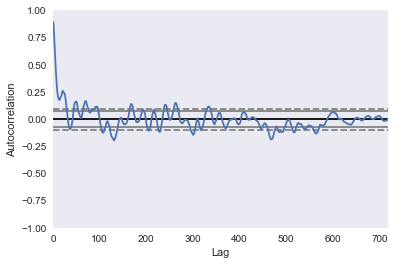

In [183]:
pd.plotting.autocorrelation_plot(standardizeddf[['CPU usage [%]']]);

In [184]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

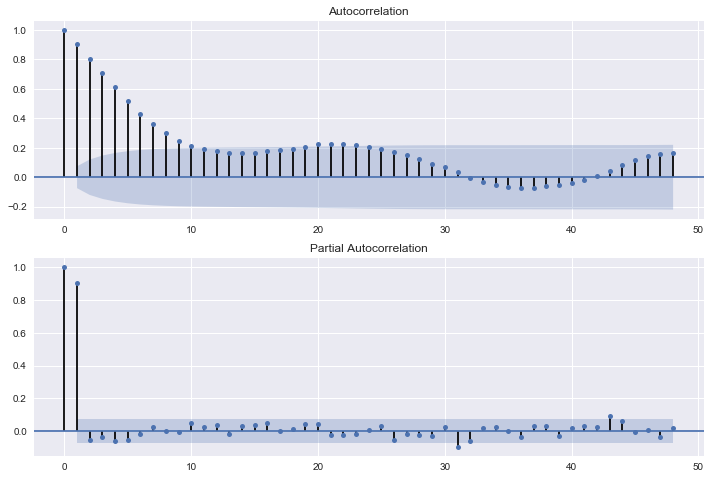

In [185]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(newdf[['CPU usage [%]']].iloc[24:], lags=48, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(newdf[['CPU usage [%]']].iloc[24:], lags=48, ax=ax2)

In [186]:
# Standardize time series data
from pandas import Series
from sklearn.preprocessing import StandardScaler
from math import sqrt
# load the dataset and print the first 5 rows
# prepare data for standardization
values = newdf['CPU usage [%]']
values = values.reshape((len(values), 1))
# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))
# standardization the dataset and print the first 5 rows
normalized = scaler.transform(values)
for i in range(5):
    print(normalized[i])
# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)
for i in range(5):
    print(inversed[i])

Mean: 1.326686, StandardDeviation: 0.485786
[-1.35775229]
[-1.41101724]
[-1.40184075]
[-1.39916859]
[-1.29392819]
[0.66710815]
[0.64123278]
[0.64569059]
[0.64698869]
[0.69811302]


In [187]:

# Creating a copy of the initial datagrame to make various transformations 
data = pd.DataFrame(hourlydat['CPU usage [%]'].copy())
data.columns = ['CPU usage [%]']

# Adding the lag of the target variable from 6 steps back up to 24
for i in range(6, 25):
    data["lag_{}".format(i)] = data['CPU usage [%]'].shift(i)

In [188]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# for time-series cross-validation set 5 folds 
tscv = TimeSeriesSplit(n_splits=5)

def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');
    
    
y = hourlydat.dropna()['CPU usage [%]']
X = hourlydat.dropna().drop(['CPU usage [%]'], axis=1)

# reserve 30% of data for testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

# machine learning in two lines
lr = LinearRegression()
lr.fit(X_train, y_train)

plotModelResults(lr, plot_intervals=True)
plotCoefficients(lr)


ValueError: shapes (214,12) and (14,) not aligned: 12 (dim 1) != 14 (dim 0)

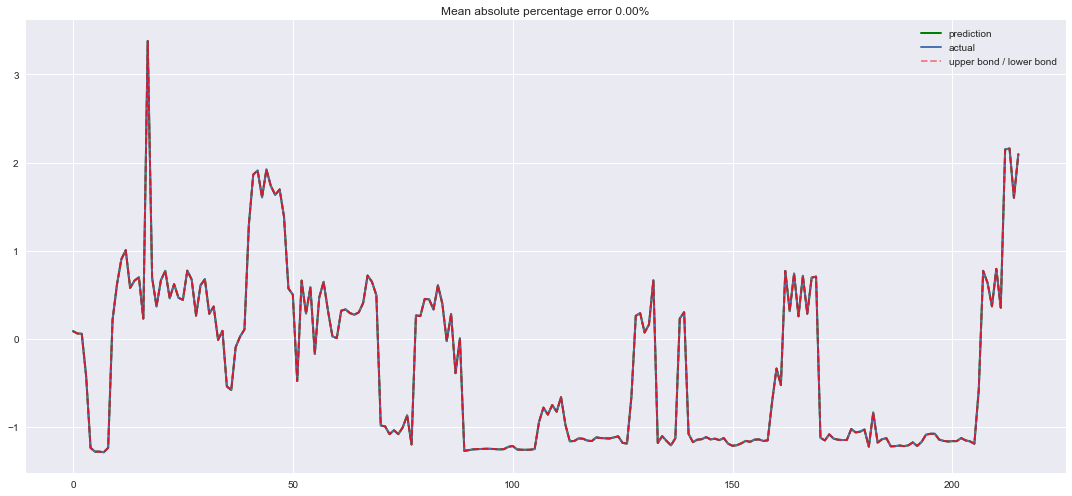

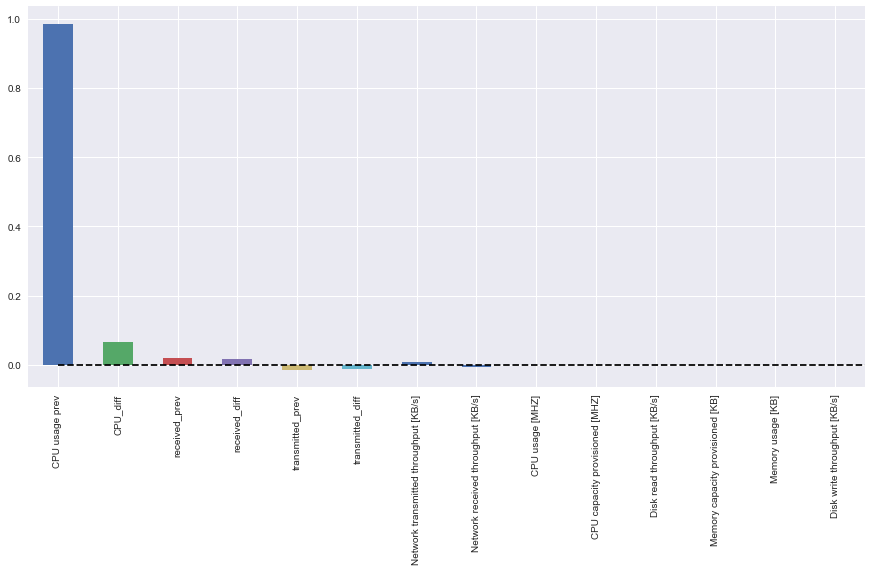

In [189]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

y = hourlydat.dropna()['CPU usage [%]']
X = hourlydat.dropna().drop(['CPU usage [%]'], axis=1)

X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True)
plotCoefficients(lr)

In [190]:
hourlydat.head()

CPU capacity provisioned [MHZ]  CPU usage [MHZ]  \
Timestamp                                                              
2013-07-31 23:00:00                        -1.72131        -1.246953   
2013-08-01 00:00:00                        -1.71154        -1.244292   
2013-08-01 01:00:00                        -1.71154        -1.245698   
2013-08-01 02:00:00                        -1.71154        -1.195052   
2013-08-01 03:00:00                        -1.71154        -1.242901   

                     CPU usage [%]  Memory capacity provisioned [KB]  \
Timestamp                                                              
2013-07-31 23:00:00      -1.218452                          1.271275   
2013-08-01 00:00:00      -1.213992                          1.296784   
2013-08-01 01:00:00      -1.212690                          1.296856   
2013-08-01 02:00:00      -1.160026                          1.297023   
2013-08-01 03:00:00      -1.194985                          1.297096   

                     Memory usage [KB]  Disk read throughput [KB/s]  \
Timestamp                                                             
2013-07-31 23:00:00          -1.075108                     0.899311   
2013-08-01 00:00:00          -1.055395                    -0.004499   
2013-08-01 01:00:00          -1.132177                     0.240520   
2013-08-01 02:00:00          -0.828576                     2.629916   
2013-08-01 03:00:00          -1.031945                     0.938184   

                     Disk write throughput [KB/s]  \
Timestamp                                           
2013-07-31 23:00:00                      0.358150   
2013-08-01 00:00:00                      0.574200   
2013-08-01 01:00:00                     -0.158034   
2013-08-01 02:00:00                      3.537786   
2013-08-01 03:00:00                      1.311122   

                     Network received throughput [KB/s]  \
Timestamp                                                 
2013-07-31 23:00:00                           -0.273241   
2013-08-01 00:00:00                           -0.084835   
2013-08-01 01:00:00                           -0.595108   
2013-08-01 02:00:00                            0.475525   
2013-08-01 03:00:00                            0.013640   

                     Network transmitted throughput [KB/s]  CPU usage prev  \
Timestamp                                                                    
2013-07-31 23:00:00                              -0.672473       -1.217115   
2013-08-01 00:00:00                              -0.537580       -1.215583   
2013-08-01 01:00:00                              -0.602894       -1.215075   
2013-08-01 02:00:00                              -0.116459       -1.161175   
2013-08-01 03:00:00                              -0.654731       -1.195441   

                     CPU_diff  received_prev  received_diff  transmitted_prev  \
Timestamp                                                                       
2013-07-31 23:00:00 -0.021876      -0.182480       0.066661         -0.537739   
2013-08-01 00:00:00  0.022903      -0.113262       0.085998         -0.451576   
2013-08-01 01:00:00  0.035064      -0.338754       0.077493         -0.505521   
2013-08-01 02:00:00  0.016233       0.119600       0.112366         -0.159903   
2013-08-01 03:00:00  0.005581      -0.071014       0.089102         -0.527486   

                     transmitted_diff  
Timestamp                              
2013-07-31 23:00:00          0.125501  
2013-08-01 00:00:00          0.128272  
2013-08-01 01:00:00          0.142673  
2013-08-01 02:00:00          0.107719  
2013-08-01 03:00:00          0.127255

In [191]:
# setting initial values and some bounds for them
ps = range(2, 5)
d=1 
qs = range(2, 5)
Ps = range(0, 3)
D=1 
Qs = range(0, 2)
s = 24 # season length is still 24

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

54

In [ ]:
def optimizeSARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(hourlydat['CPU usage [%]'], order=(param[0], d, param[1]), 
                                            seasonal_order=(param[3], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

  
result_table = optimizeSARIMA(parameters_list, d, D, s)

HBox(children=(IntProgress(value=0, max=54), HTML(value='')))

In [568]:

# set the parameters that give the lowest AIC
p, q, P, Q = result_table.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(hourlydat['CPU usage [%]'], order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                      CPU usage [%]   No. Observations:                  719
Model:             SARIMAX(2, 1, 3)x(0, 1, 1, 24)   Log Likelihood                -428.823
Date:                            Mon, 11 Jun 2018   AIC                            871.647
Time:                                    23:47:51   BIC                            903.692
Sample:                                07-31-2013   HQIC                           884.019
                                     - 08-30-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0146      0.263     -0.056      0.956      -0.530       0.501
ar.L2          0.8449      0.240   

In [161]:
def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future
        
    """
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:s+d] = np.NaN
    
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.arima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])

    plt.figure(figsize=(15, 7))
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    plt.plot(forecast, color='r', label="model")
    plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    plt.plot(data.actual, label="actual")
    plt.legend()
    plt.grid(True);
    
plotSARIMA(hourlydat, best_model, 50)

NameError: name 'best_model' is not defined

## Lags of time series


In [158]:
# Creating a copy of the initial datagrame to make various transformations 
data = pd.DataFrame(hourlydat['CPU usage [%]'].copy())
data.columns = ["y"]

# Adding the lag of the target variable from 6 steps back up to 10
for i in range(1, 10):
    data["lag_{}".format(i)] = data.y.shift(i)

In [159]:
data.head()

y     lag_1     lag_2     lag_3     lag_4  lag_5  \
Timestamp                                                                      
2013-07-31 23:00:00 -1.218452       NaN       NaN       NaN       NaN    NaN   
2013-08-01 00:00:00 -1.213992 -1.218452       NaN       NaN       NaN    NaN   
2013-08-01 01:00:00 -1.212690 -1.213992 -1.218452       NaN       NaN    NaN   
2013-08-01 02:00:00 -1.160026 -1.212690 -1.213992 -1.218452       NaN    NaN   
2013-08-01 03:00:00 -1.194985 -1.160026 -1.212690 -1.213992 -1.218452    NaN   

                     lag_6  lag_7  lag_8  lag_9  
Timestamp                                        
2013-07-31 23:00:00    NaN    NaN    NaN    NaN  
2013-08-01 00:00:00    NaN    NaN    NaN    NaN  
2013-08-01 01:00:00    NaN    NaN    NaN    NaN  
2013-08-01 02:00:00    NaN    NaN    NaN    NaN  
2013-08-01 03:00:00    NaN    NaN    NaN    NaN

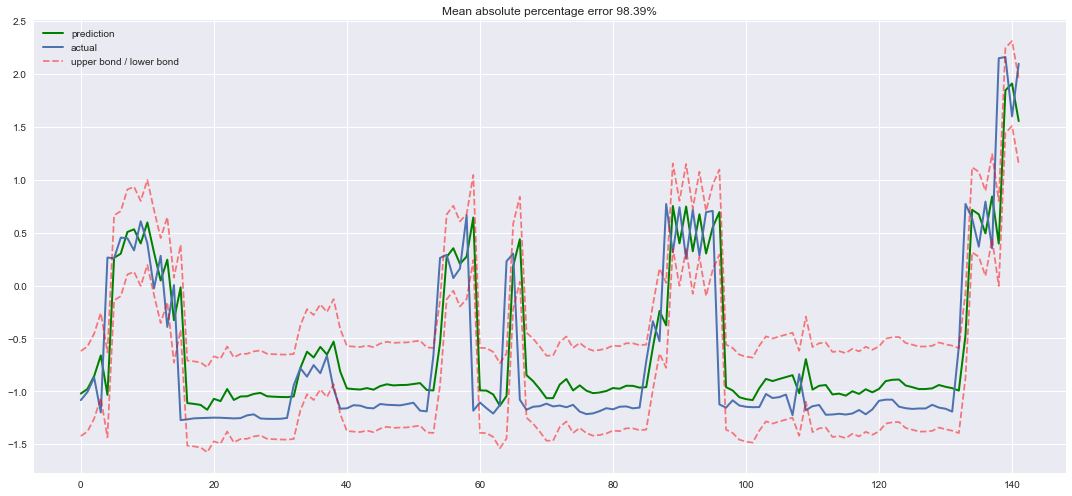

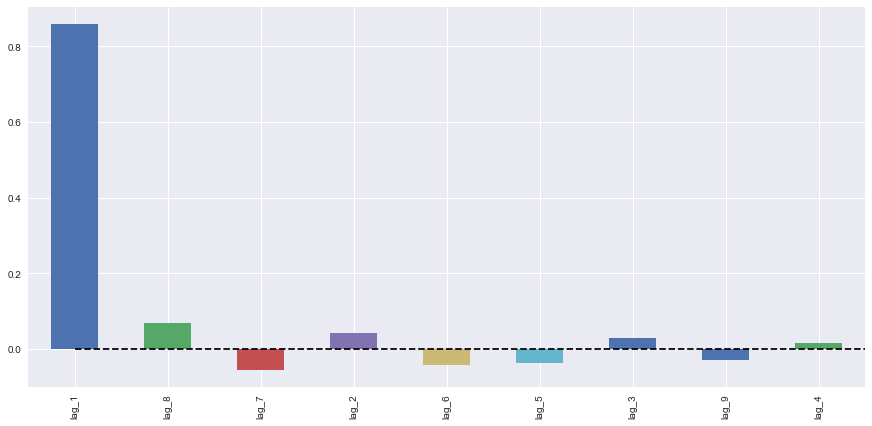

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# for time-series cross-validation set 5 folds 
tscv = TimeSeriesSplit(n_splits=5)

def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');
    
    
y = data.dropna().y
X = data.dropna().drop(['y'], axis=1)

# reserve 30% of data for testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.2)

# machine learning in two lines
lr = LinearRegression()
lr.fit(X_train, y_train)

plotModelResults(lr, plot_intervals=True)
plotCoefficients(lr)


In [165]:
data.index = data.index.to_datetime()
data["hour"] = data.index.hour
data["weekday"] = data.index.weekday
data['is_weekend'] = data.weekday.isin([5,6])*1

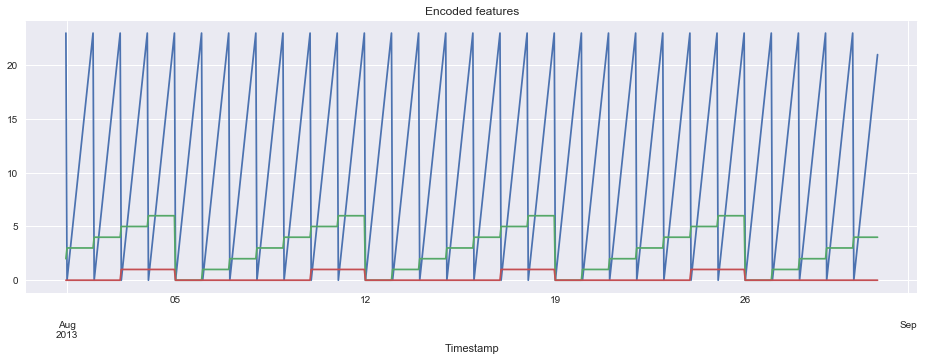

In [166]:
plt.figure(figsize=(16, 5))
plt.title("Encoded features")
data.hour.plot()
data.weekday.plot()
data.is_weekend.plot()
plt.grid(True);

In [167]:
#Blue spiky line — hour feature, green ladder — weekday, red bump — weekends!

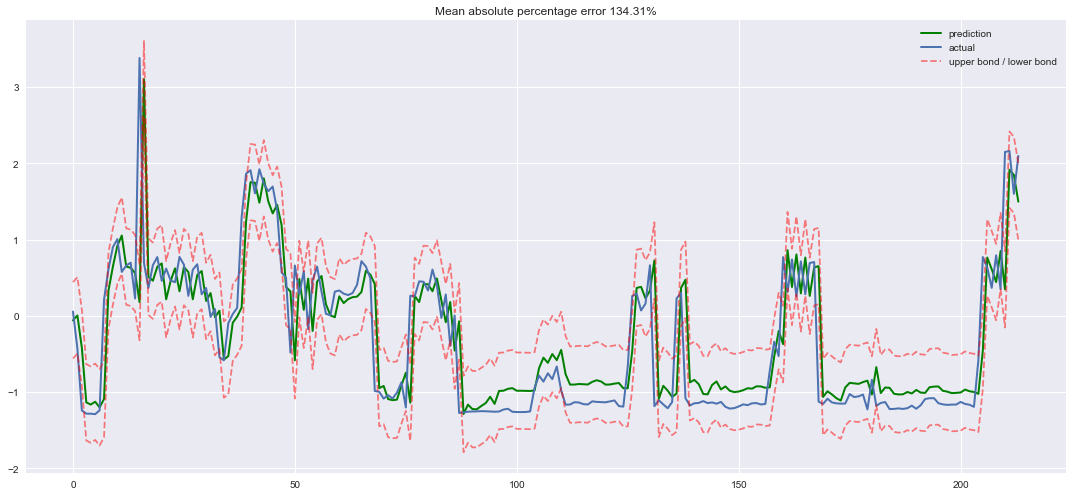

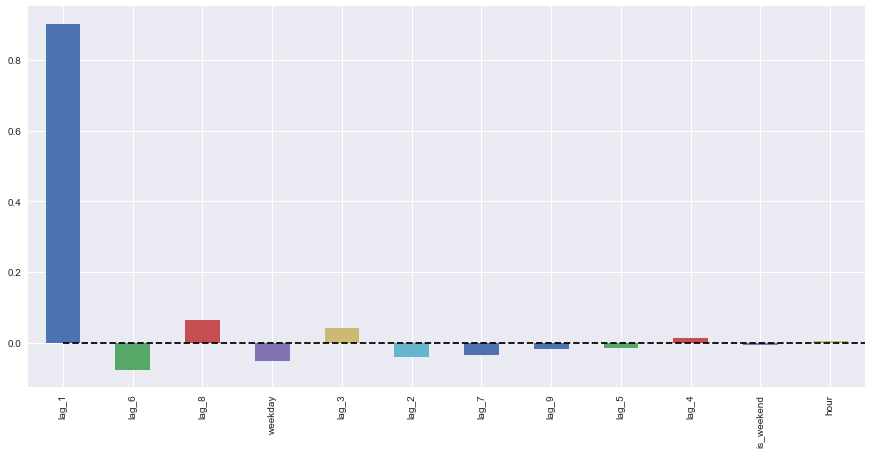

In [168]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

y = data.dropna().y
X = data.dropna().drop(['y'], axis=1)

X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True)
plotCoefficients(lr)

In [169]:
def code_mean(data, cat_feature, real_feature):
    """
    Returns a dictionary where keys are unique categories of the cat_feature,
    and values are means over real_feature
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())

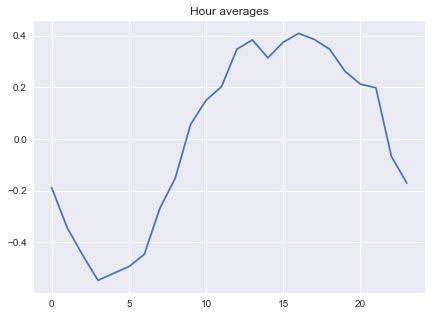

In [170]:

average_hour = code_mean(data, 'hour', "y")
plt.figure(figsize=(7, 5))
plt.title("Hour averages")
pd.DataFrame.from_dict(average_hour, orient='index')[0].plot()
plt.grid(True);

In [171]:
def prepareData(series, lag_start, lag_end, test_size, target_encoding=False):
    """
        series: pd.DataFrame
            dataframe with timeseries
        lag_start: int
            initial step back in time to slice target variable 
            example - lag_start = 1 means that the model 
                      will see yesterday's values to predict today
        lag_end: int
            final step back in time to slice target variable
            example - lag_end = 4 means that the model 
                      will see up to 4 days back in time to predict today
        test_size: float
            size of the test dataset after train/test split as percentage of dataset
        target_encoding: boolean
            if True - add target averages to the dataset
        
    """
    
    # copy of the initial dataset
    data = pd.DataFrame(series.copy())
    data.columns = ["y"]
    
    # lags of series
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.y.shift(i)
    
    # datetime features
    data.index = data.index.to_datetime()
    data["hour"] = data.index.hour
    data["weekday"] = data.index.weekday
    data['is_weekend'] = data.weekday.isin([5,6])*1
    #data['network received'] = hourlydat[['Network received throughput [KB/s]']]
    #data['network transmitted'] = hourlydat[['Network transmitted throughput [KB/s]']]
    data['cpu diff'] = hourlydat[['CPU_diff']]
    data['day'] = hourlydat[['day']]
    data['mem usage'] = hourlydat[['Memory usage [KB]']]

    if target_encoding:
        # calculate averages on train set only
        test_index = int(len(data.dropna())*(1-test_size))
        data['weekday_average'] = list(map(
            code_mean(data[:test_index], 'weekday', "y").get, data.weekday))
        data["hour_average"] = list(map(
            code_mean(data[:test_index], 'hour', "y").get, data.hour))

        # drop encoded variables 
        data.drop(["hour", "weekday"], axis=1, inplace=True)
    
    # train-test split
    y = data.dropna().y
    X = data.dropna().drop(['y'], axis=1)
    X_train, X_test, y_train, y_test =\
    timeseries_train_test_split(X, y, test_size=test_size)

    return X_train, X_test, y_train, y_test
  
  
X_train, X_test, y_train, y_test =\
prepareData(concatenated_df[['CPU usage [%]']], lag_start=2, lag_end=12, test_size=0.2, target_encoding=True)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(lr)

KeyError: "['day'] not in index"

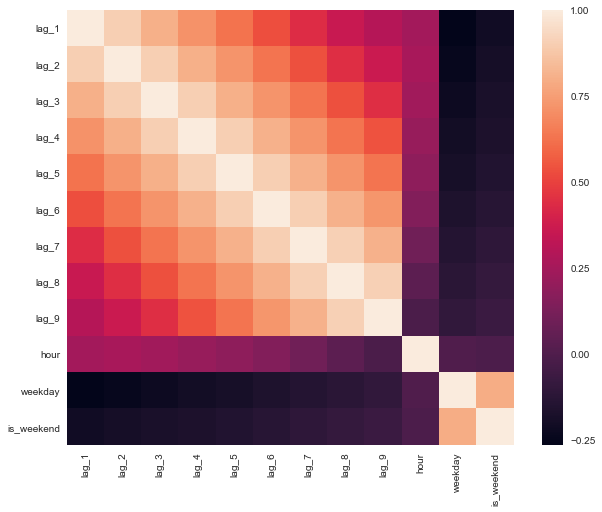

In [172]:

plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr());

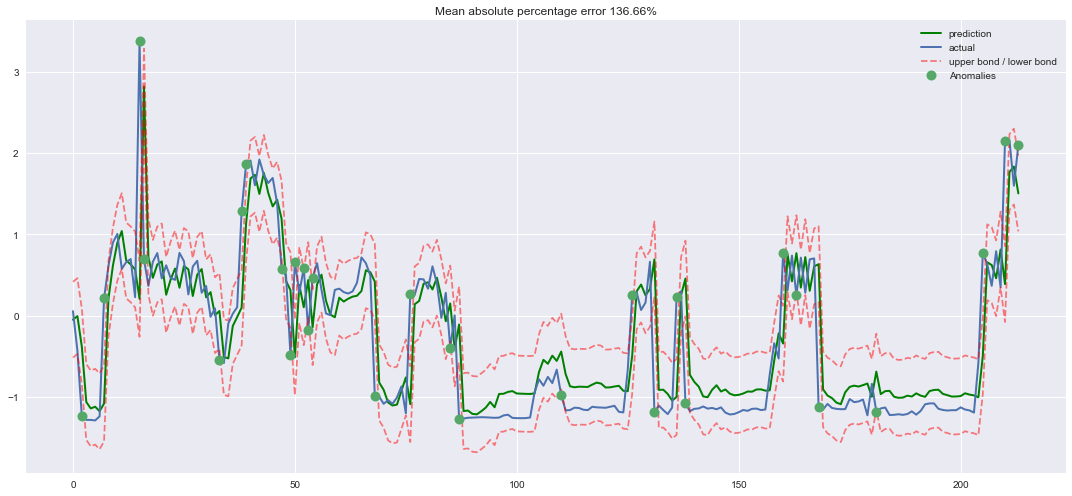

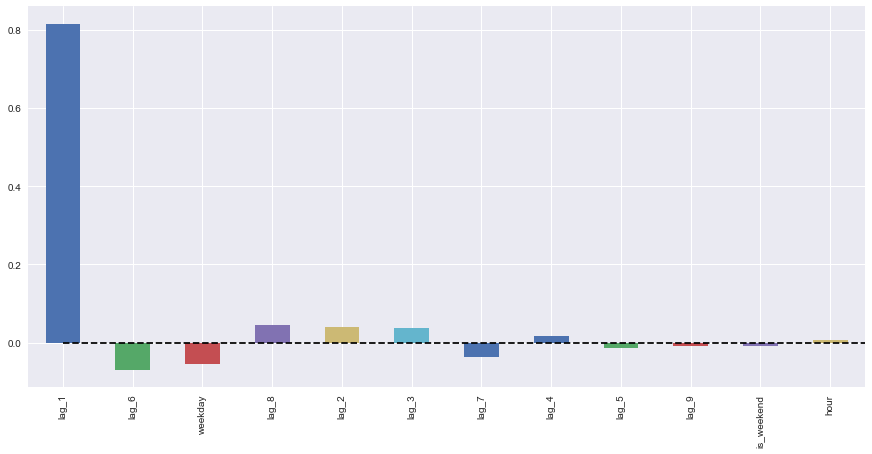

In [173]:

from sklearn.linear_model import LassoCV, RidgeCV

ridge = RidgeCV(cv=tscv)
ridge.fit(X_train_scaled, y_train)

plotModelResults(ridge, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(ridge)

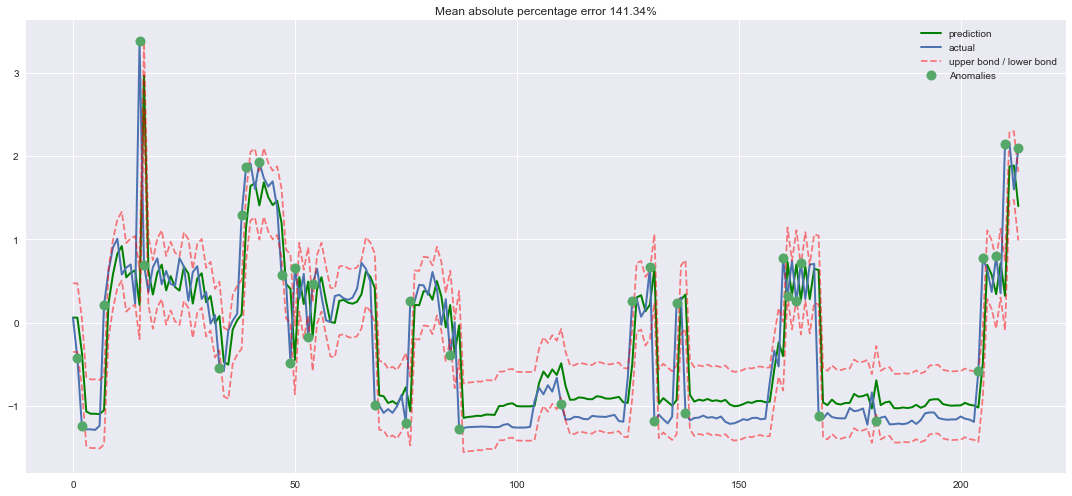

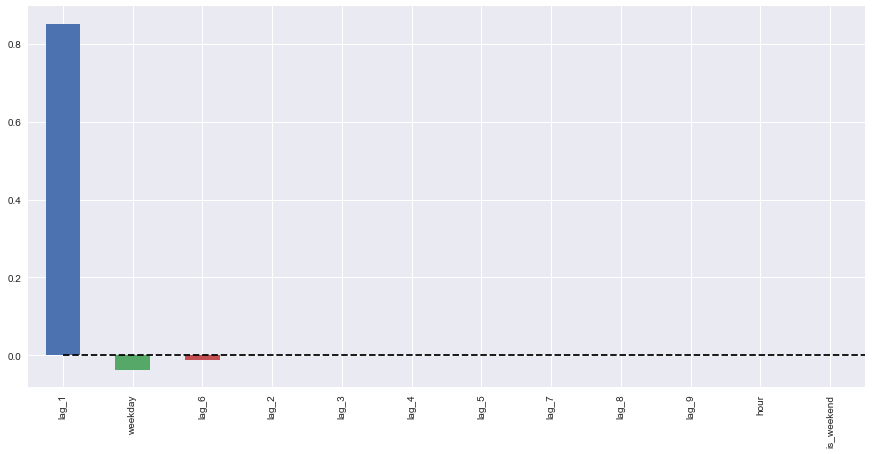

In [174]:

lasso = LassoCV(cv=tscv)
lasso.fit(X_train_scaled, y_train)

plotModelResults(lasso, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(lasso)